In [1]:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.filterwarnings(action='ignore')

import missingno as msno
import pandas as pd
import numpy as np
import random
import seaborn as sns

# 한글 깨짐 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

# 기본 세팅
mpl.rc("font", family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (12,10)
%matplotlib inline
sns.set()

In [2]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor



from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# voting
from sklearn.ensemble import VotingClassifier
# bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# boosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# param: squared=False, RMSE
from sklearn.metrics import mean_squared_error
# no squared option
from sklearn.metrics import mean_absolute_error


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score


# datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn import datasets

In [3]:
df_origin = sns.load_dataset('penguins')
df_origin.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE


# 결측치 처리

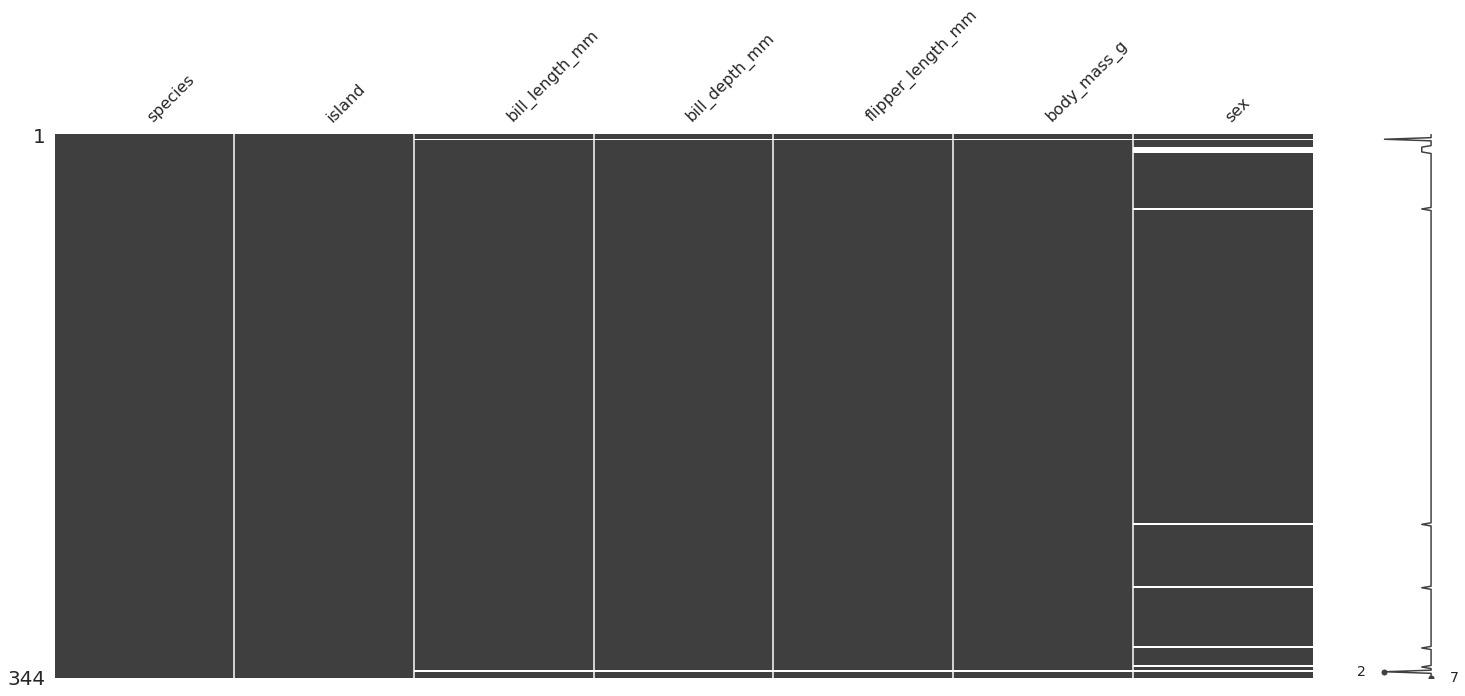

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [4]:
msno.matrix(df_origin);
plt.show()
# msno.bar(df)
# plt.show()
print(df_origin.isna().sum())

## 1. 기본 제거

In [5]:
dropna_row = df_origin.dropna(axis=0)
print("origin:", df_origin.shape)
print("dropped:", dropna_row.shape)

origin: (344, 7)
dropped: (333, 7)


## 2. 행을 기준으로 결측치를 제외한 열의 개수가 thresh 적으면 drop

In [6]:
dropped1 = df_origin.dropna(thresh=5)
dropped1.shape
print("origin:", df_origin.shape)
print("dropped shape:", dropped1.shape)
print()
print("dropped:", dropped1.isna().sum())

origin: (344, 7)
dropped shape: (342, 7)

dropped: species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64


## 3. 열 기준 결측치를 제외한 행의 개수가 thresh 보다 적으면 해당 열 drop

In [7]:
dropped2 = df_origin.dropna(thresh=342, axis=1)
print("origin:", df_origin.shape)
print("dropped shape:", dropped2.shape)
print()
print("dropped:", dropped2.isna().sum())

origin: (344, 7)
dropped shape: (344, 6)

dropped: species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64


## 결측치 대체

- 결측치를 포함하고 있는 열이 다른 열과 상관관계를 기준으로 판단

### 상관관계 확인

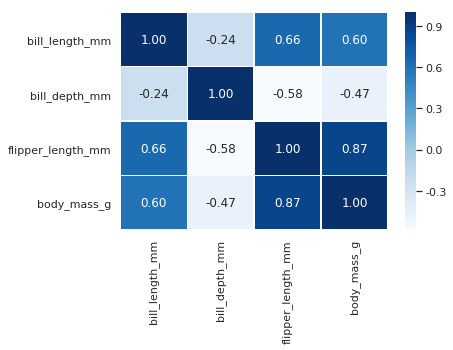

In [8]:
# plt.figure(figsize=(15,15))
sns.heatmap(df_origin.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

## 상관관계가 낮을 때

## 1. 평균으로 대체 (연속형 변수)

In [9]:
_mean = df_origin.bill_length_mm.mean()

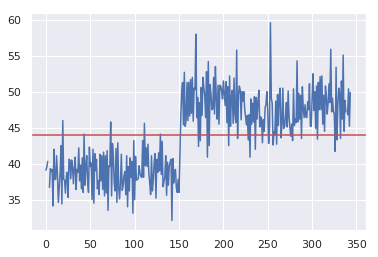

In [10]:
plt.plot(df_origin.bill_length_mm)
plt.axhline(_mean, 0, df_origin.shape[0], c='r')

# df_origin.bill_length_mm.fillna(_mean) # 반드시 변수에 할당해줘야함. 예제라서 스킵

## 2. 최빈값으로 대체 (범주형 변수)

In [11]:
df_origin['island'].mode()
# data3['categorical_var'].fillna(data3['categorical_var'].mode()[0])

0    Biscoe
dtype: object

# 상관관계가 높을 때

## 1. 모델 대체: voting (예제 제외)

## 2. 조건 대체

In [12]:
# data4.groupby(data4.categorical_var).continuous_var.transform(lambda x: x.fillna(x.mean()))

---

# Scaling
- 스케일링 하는 이유: 변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 target에 미치는 영향령을 제대로 반영하기 어렵기 때문
- 과적합된 모델은 극도로 크거나 작은 가중치를 갖는 경향을 보임

## MinMax Scaling

#### scaled 값 확인 - 최소 0, 최대 1로 변환됨
- 각 열은 각각의 최대 최소로 스케일링 됨

## 수치형 열만 선택

In [13]:
numerical_df = df_origin.select_dtypes("float")

In [14]:
mscaler = MinMaxScaler()
mscaler.fit(numerical_df)
mscaled = mscaler.transform(numerical_df)
mscaled_df = pd.DataFrame(mscaled, columns=numerical_df.columns)

print(numerical_df.min())
print()
print(mscaled_df.min())

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
dtype: float64


## Standard Scaling
- z 변환. 데이터를 통계적으로 표준 정규분포화
- 데이터의 평균은 0, 표준편차는 1로 정규화 됨

In [15]:
sdscaler = StandardScaler()
sdscaler.fit(numerical_df)
sdscaled = sdscaler.transform(numerical_df)
# sdscaler.fit_transform(numerical_df) 하면 한번에 변환

sdscaled_df = pd.DataFrame(sdscaled, columns=numerical_df.columns)

print(numerical_df.min())
print()
print(sdscaled_df.min())

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

bill_length_mm      -2.168526
bill_depth_mm       -2.054446
flipper_length_mm   -2.059320
body_mass_g         -1.875362
dtype: float64


# Encoding

## label encoding
- n개의 범주형 데이터를 0~n의 연속적인 수치 데이터로 표현

In [16]:
cat_var = [
    ['yellow', 'M', '23', 'a'],
    ['red', 'L', '26', 'b'],
    ['blue', 'XL', '20', 'c']
]

In [17]:
df_car = pd.DataFrame(data=cat_var, columns=['color', 'size', 'price', 'type'])
df_car

,color,size,price,type
0,yellow,M,23,a
1,red,L,26,b
2,blue,XL,20,c


In [18]:
np_car = df_car.values
shop_le = LabelEncoder()
shop_le.fit_transform(np_car[:, 0])

array([2, 1, 0])

In [19]:
shop_le.fit_transform(np_car[:, 1])

array([1, 0, 2])

In [20]:
# 3번째 열은 숫자이므로 그냥 숫자처리
# shop_le.fit_transform(x[:, 2])
np_car[:, 2].astype(float)

array([23., 26., 20.])

In [21]:
shop_le.fit_transform(np_car[:, 3])

array([0, 1, 2])

## One-hot Encoding

In [22]:
pd.get_dummies(df_car)

,color_blue,color_red,color_yellow,size_L,size_M,size_XL,price_20,price_23,price_26,type_a,type_b,type_c
0,0,0,1,0,1,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,1


---

# Basic preprocessing based on above
- Missing value
- Encoding categorical variables

In [23]:
print(df_origin.isna().sum())
print("간단히 dropna로 진행")

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
간단히 dropna로 진행


In [24]:
df = df_origin.dropna(axis=0)
df.shape

(333, 7)

In [25]:
encoder = LabelEncoder()

In [26]:
X = df.drop('species', axis=1)
y = df[['species']]

In [27]:
X.island = encoder.fit_transform(df['island']) # pass 1d array
X.sex = encoder.fit_transform(df['sex'])

In [28]:
y_encoded = encoder.fit_transform(np.squeeze(y, axis=1)) # pass 1d array
y = pd.DataFrame(y_encoded, columns=['species'])

---

# plot imblanced class

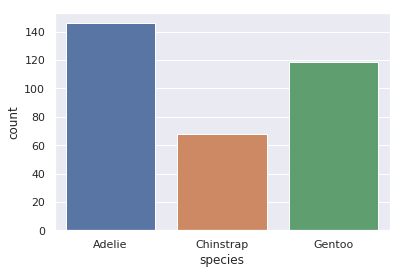

In [29]:
sns.countplot(x='species', data=df)
plt.show()

# Multi-dimension plot

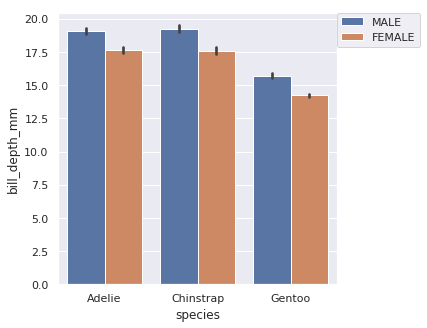

In [30]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="species", y="bill_depth_mm", hue="sex", data=df)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

# Multi-boxplot 

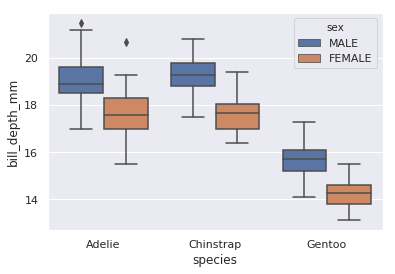

In [31]:
sns.boxplot(x="species", y="bill_depth_mm", hue="sex", data=df)
plt.show()

# pivot

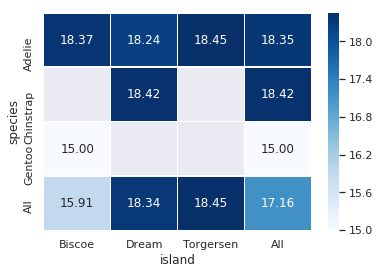

In [32]:
pivot1 = pd.pivot_table(df, index='species', columns='island', values='bill_depth_mm', aggfunc='mean', margins=True)
sns.heatmap(pivot1, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

---

# Outlier

In [33]:
numerical_df = df.select_dtypes("float")
numerical_df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [34]:
numerical_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## Boxplot

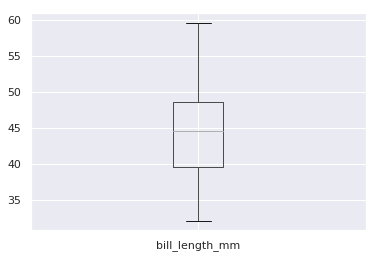

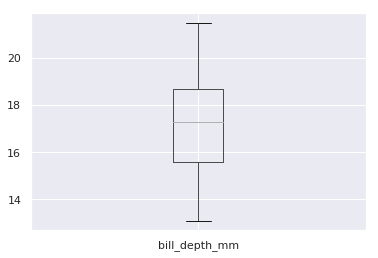

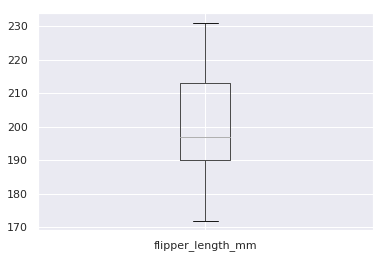

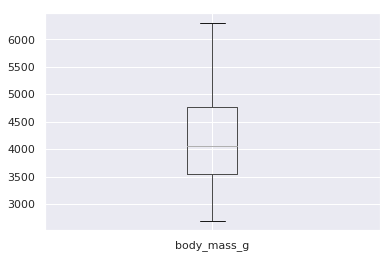

In [35]:
for col in numerical_df.columns:
    numerical_df.boxplot(column=[col])
    plt.show()

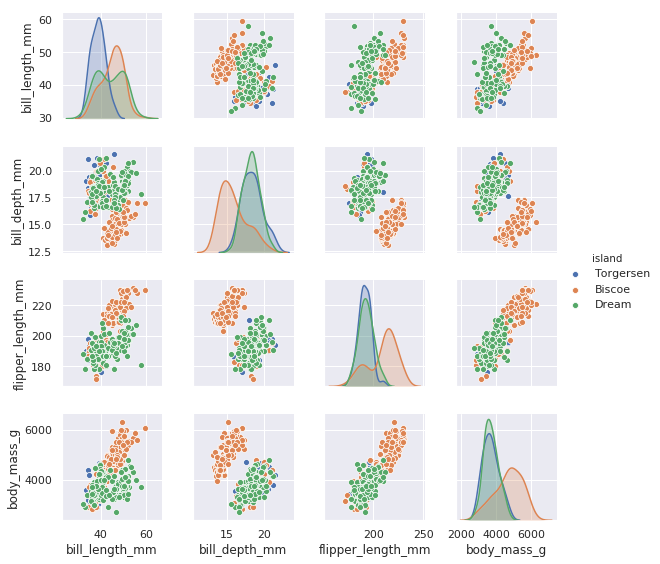

In [36]:
sns.pairplot(df, hue='island', height=2.0)
plt.show()

## 이상치 제거

In [37]:
# df.drop(df[df['exam_score'] > 10].index)

## 특정값 대치

In [38]:
# df.loc[df['attendance'] > 20, ['attendance']] = 20

---

# Sampling
- 분류를 목적으로 하는 데이터셋에 클래스가 불균형인 경우, 분류 학습이 어려움
- 대표적인 sampling 함수
    - over-sampling
        - RandomOverSampler: random sampler
        - ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
        - *SMOTE: Synthetic Minority Over-sampling Technique
            - 합성데이터를 생성하는 방식
            - 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터를 찾고, 그 사이에 새로운 데이터를 생성
            - knn이나 부트스래핑 사용
                - 장점
                    - 데이터 손실이 발생하지 않음
                    - RandomOverSampler 보다 과적합 완화
                - 단점
                    - 새로운 데이터에 대해서는 예측이 취약
    - under-sampling
        - RandomUnderSampler: random under-sampling method
        - TomekLinks: Tomek’s link method
        - CondensedNearestNeighbour: condensed nearest neighbour method
        - OneSidedSelection: under-sampling based on one-sided selection method
        - EditedNearestNeighbours: edited nearest neighbour method
        - NeighbourhoodCleaningRule: neighbourhood cleaning rule

## over-sampling & under-sampling
- 가장 쉬운 샘플링 기법
- 무작위로 데이터를 선택하고
    - 복제하면 over-sampling 많은 class 데이터 개수에 맞춤
    - 제거하면 under-sampling. 적은 class 데이터 개수에 맞춤
- 문제점
    - 복제하는 경우, 똑같은 데이터가 생성되므로 과적합 발생하기 쉬워짐
    - 제거하는 경우, 데이터의 정보량이 손실    

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=2019)
# train, test = train_test_split(df)

#### 기존 class 개수

In [40]:
y_train.value_counts()

species
0          123
2           92
1           51
dtype: int64

#### 오버샘플링 후 클래스 개수

In [41]:
ros = RandomOverSampler(random_state=2019)
oversampled_data, oversampled_label = ros.fit_resample(X_train, y_train)
oversampled_df = pd.DataFrame(oversampled_data, columns=X_train.columns)
# pd.get_dummies(oversampled_label).sum()
oversampled_label.value_counts()

species
2          123
1          123
0          123
dtype: int64

#### 언더샘플링 후 클래스 개수

In [42]:
rus = RandomUnderSampler(random_state=2019)
undersampled_data, undersampled_label = rus.fit_resample(X_train, y_train)
undersampled_df = pd.DataFrame(undersampled_data, columns=X_train.columns)
# pd.get_dummies(undersampled_label).sum()
undersampled_label.value_counts()

species
2          51
1          51
0          51
dtype: int64

In [43]:
smote = SMOTE(k_neighbors=5, random_state=2019)
smoted_data, smoted_label = smote.fit_resample(X_train, y_train)
smoted_data_df = pd.DataFrame(smoted_data, columns=smoted_data.columns)
smoted_label_df = pd.DataFrame(smoted_label, columns=["target"])

In [44]:
smoted_label.value_counts()

species
2          123
1          123
0          123
dtype: int64

## 분류 모델을 통해 결과 비교

In [45]:
def train_and_test(model, X_train, X_test, y_train, y_test):
    
    if type(y_train) == pd.DataFrame:
        _y_train = y_train.values.ravel()
    else:
        _y_train = y_train
    
    model.fit(X_train, _y_train)
    y_hat = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_hat) * 100, 2)
    return accuracy

In [46]:
print("original data accuracy: ", train_and_test(SVC(), X_train, X_test, y_train, y_test))
print("over-sampling data accuracy: ", train_and_test(SVC(), oversampled_data, X_test, oversampled_label, y_test))
print("under-sampling data accuracy: ", train_and_test(SVC(), undersampled_data, X_test, undersampled_label, y_test))
print("SMOTE data accuracy: ", train_and_test(SVC(), smoted_data, X_test, smoted_label, y_test))

original data accuracy:  68.66
over-sampling data accuracy:  64.18
under-sampling data accuracy:  59.7
SMOTE data accuracy:  64.18


---

# Regression
- 결과 plot

In [47]:
def plot_regression(reg, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=2019)

    reg.fit(X_train.reshape(-1, 1), y_train)
    y_hat = reg.predict(X_test.reshape(-1, 1))

    sns.scatterplot(X_test, y_test)
    sns.lineplot(X_test, y_hat, color='r')

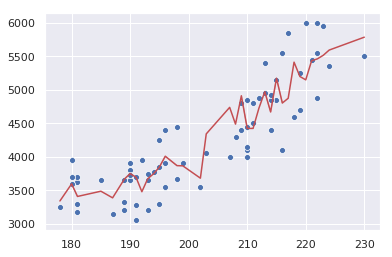

In [48]:
reg = LinearRegression()
reg = SVR()
reg = DecisionTreeRegressor()
reg = RandomForestRegressor()

numerical_df = df_origin.select_dtypes("float")
numerical_df = numerical_df.dropna(axis=0)

tmp_y = numerical_df.body_mass_g.values
tmp_X = numerical_df.flipper_length_mm.values

# numpy로 넣는걸로 고정..
plot_regression(reg, tmp_X, tmp_y)

# 회귀분석

- 가정
    - 정규성: 각 자료는 정규분포를 따른다.
    - 독립성: 각 자료는 서로 독립적이다.
    - 등분산: 잔차의 분산이 일정하다.

- 장점
    - 가장 많이 사용됨
    - 이해 및 해석이 용이. 결과에 대한 근거, 이유 활용방안 등 유용한 정보를 얻을 수 있음
    - 목표 변수와 관련 없는 설명 변수를 선택 또는 제거하는 방법 제공
        - 전진선택법
        - 후진제거법
        
- 단점
    - 비선형 관계를 확인하기 위한 적절한 기준이 없음
    - 결측치는 분석에서 무조건 제외됨. 알고리즘에서 내부적으로 자동으로 제외
    - 결측 발생 원인 확인을 통해 적절한 사전 대체 작업 필요

## 선형회귀
- 키워드
    - VIF(분산팽창계수)
        - 독립변수들 사이에서 상관관계를 갖는 현상
    - 결정계수($R^2$, R-squared)
        - 회귀식이 얾나나 실제 데이터를 설명하는지를 나타는 값
        - predictor가 많아지면 결정계수 값은 커짐
        
    - 수정결정계수($adjusted R^2$)
        
    - 공분산
        - 두 변수가 독립일 때, 공분산 값은 0
        - 0이라고 해서 독립은 아님
    - 잔차
        - 실제값($y$)과 예측값($\hat{y}$)의 차이 : $y_i - \hat{y}$

### 단순선형회귀
- $y = \beta_0 + \beta_1 x + \epsilon$
    - $\beta_0$: 절편. 모델이 y축을 통과하는점
    - $\beta_1$: 모델의 기울기. x가 한 단위 증가에 따른 y의 변화폭
    
- 모델 검정은 t-test

- 오차항(${\epsilon}$)의 필요조건
    - 오차항: 모델의 오차
    - $\epsilon$ ~ $N(0, \sigma)$
    - 오차항은 독립
    
- 분석절차
    - 경향성 확인
        - 산점도
        - 상관분석: 변수간 선형적 관계가 있는지 분석. 상관계수(corr)로 확인
            - corr 가 1에 가까울수록 양의 상관관계
            - corr 가 -1에 가까울수록 음의 상관관계
    - 모델의 적합성 확인
        - 추정된 표준오차 확인
        - 결정계수로 설명력 확인
        - ANOVA 분석결과 확인 - 모델 유형의 적합성. F-test
    - 회귀계수 계산
    - 오차(잔차)의 가정 확인 (오차의 정규성, 오차의 등분산성, 오차의 독립성)
    - 모델 선정
    
    
- 최소자승법
    - 잔차의 제곱합(SSE, Sum of Squred Error)이 최소가 되도록 하는 최적의 회귀식을 구하는 방법

In [49]:
data_x = np.arange(20)
data_y = data_x*2 + np.random.uniform(-2, 2, 20)

In [50]:
df = pd.DataFrame({'UNITS':data_x, "MINUTES":data_y})
df.head()

,UNITS,MINUTES
0,0,-1.168263
1,1,1.398139
2,2,3.759940
3,3,6.840206
4,4,7.994800


### 경향성 확인

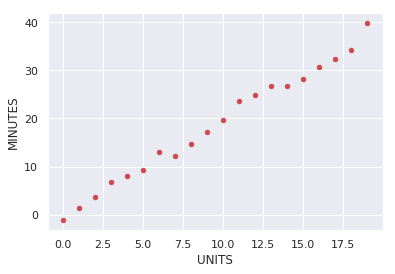

In [51]:
df.plot.scatter(x='UNITS', y='MINUTES', c='r')

In [52]:
df.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.995
MINUTES,0.995,1.000


In [53]:
from statsmodels.formula.api import ols # 회귀분석

# y ~ x1
# 상수항 안들어감
reg_model = ols('MINUTES ~ UNITS', data=df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1724.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.51e-19
Time:                        23:36:54   Log-Likelihood:                -31.538
No. Observations:                  20   AIC:                             67.08
Df Residuals:                      18   BIC:                             69.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2729      0.532     -0.513      0.6

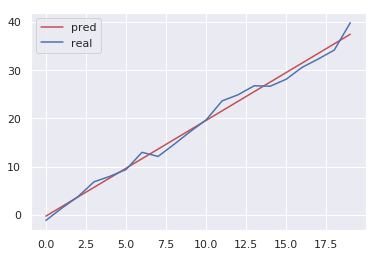

In [54]:
pred = reg_result.predict(df['UNITS'])
plt.plot(pred, c='r', label='pred')
plt.plot(df['MINUTES'], label='real')
plt.legend()

In [55]:
df.loc[0, 'MINUTES'] - pred[0]

-0.8953258852783086

#### 잔차의 정규성
- 0을 기준으로 산포됨

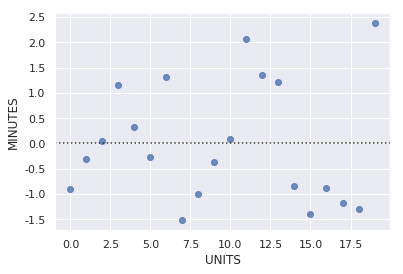

In [56]:
sns.residplot('UNITS', 'MINUTES', df)

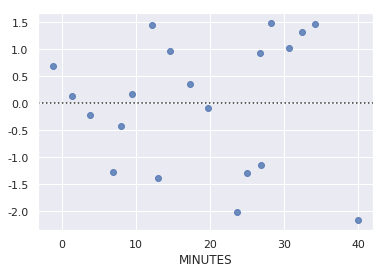

In [57]:
obs = reg_result.resid.values
z = (obs - np.mean(obs))/np.std(obs)
sns.residplot(df['MINUTES'], pred)

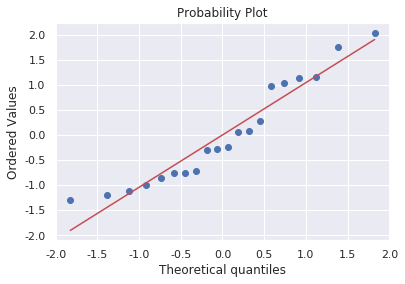

In [58]:
import scipy.stats as stats
stats.probplot(z, dist='norm', plot=plt);

# 다중회귀

In [59]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from statsmodels import api as sm # 절편추가를 위함
from statsmodels.formula.api import ols # 회귀분석

In [60]:
numerical_df = df_origin.select_dtypes("float")
numerical_df = numerical_df.dropna(axis=0)

tmp_y = numerical_df.body_mass_g
tmp_X = numerical_df.drop('body_mass_g', axis=1)

In [61]:
X_const = sm.add_constant(tmp_X)
X_const.head()

,const,bill_length_mm,bill_depth_mm,flipper_length_mm
0,1.0,39.1,18.7,181.0
1,1.0,39.5,17.4,186.0
2,1.0,40.3,18.0,195.0
4,1.0,36.7,19.3,193.0
5,1.0,39.3,20.6,190.0


In [62]:
reg_multi_model = sm.OLS(tmp_y, X_const).fit()
print(reg_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          8.19e-105
Time:                        23:36:55   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6424.7647    561.46

### VIF가 크면 제외
- 설명 변수 간 사아관관계가 높아 발생하는 문제

In [63]:
df_vif = pd.DataFrame()
df_vif['variable'] = X_const.columns
df_vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
df_vif.sort_values("VIF")
df_vif

,variable,VIF
0,const,696.624537
1,bill_length_mm,1.865090
2,bill_depth_mm,1.611292
3,flipper_length_mm,2.673338


## 후진제거법

In [64]:
lr_model = LinearRegression()
# n_feautres_to_select 선택이 애매함
rfe = RFE(estimator=lr_model, n_features_to_select=2).fit(tmp_X, tmp_y)
selected_cols = tmp_X.columns[rfe.support_]
removed_cols = tmp_X.columns[~rfe.support_]
print(selected_cols)
print(removed_cols)

Index(['bill_depth_mm', 'flipper_length_mm'], dtype='object')
Index(['bill_length_mm'], dtype='object')


## 후진제거법 이후 모델링

In [65]:
X_const_rfe = sm.add_constant(tmp_X[selected_cols])
reg_multi_model_rfe = sm.OLS(tmp_y, X_const_rfe).fit()
print(reg_multi_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     539.8
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          4.23e-106
Time:                        23:36:55   Log-Likelihood:                -2527.0
No. Observations:                 342   AIC:                             5060.
Df Residuals:                     339   BIC:                             5071.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6541.9075    540.75

In [66]:
df_vif = pd.DataFrame()
df_vif['variable'] = X_const_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_const_rfe.values, i) for i in range(X_const_rfe.shape[1])]
df_vif.sort_values("VIF")
df_vif.round(3)

,variable,VIF
0,const,646.906
1,bill_depth_mm,1.517
2,flipper_length_mm,1.517


## 최종 회귀식

In [67]:
reg_multi_model_rfe.params

const               -6541.907498
bill_depth_mm          22.634138
flipper_length_mm      51.541445
dtype: float64

## 표준화 회귀계수를 이용한 변수 중요도 확인

In [68]:
from sklearn.preprocessing import scale

X_scaled = scale(tmp_X[selected_cols])
X_scaled_const = sm.add_constant(X_scaled)

reg_model_scaled = sm.OLS(tmp_y, X_scaled_const).fit()
reg_model_scaled.params

const    4201.754386
x1         44.632346
x2        723.700672
dtype: float64

# 다항회귀(polynormial)

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [70]:
numerical_df = df_origin.select_dtypes("float")
numerical_df = numerical_df.dropna(axis=0)

tmp_y = numerical_df.body_mass_g.values
tmp_X = numerical_df.flipper_length_mm.values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y, test_size=0.2)

In [72]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X_train.reshape(-1, 1))
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

In [73]:
poly_trf = poly.transform(X_train.reshape(-1, 1))

In [74]:
poly_lr = LinearRegression()
poly_lr.fit(poly_trf, y_train)

LinearRegression()

In [75]:
y_hat = poly_lr.predict(poly.transform(X_test.reshape(-1, 1)))

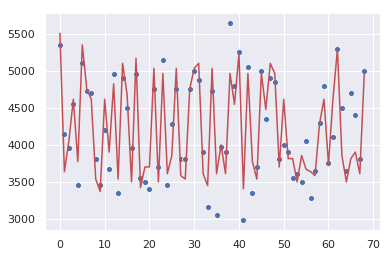

In [76]:
sns.scatterplot(np.arange(len(y_test)), y_test)
sns.lineplot(data=y_hat, color='r')
plt.show()

# Ensemble

## Voting
- 동일한 데이터에 대해서 여러 분류기를 생성
- 예측한 결과를 기반으로 투표하여 최종 예측 결과 선정

## 1. 직접 구현

In [77]:
lg_param = {'C': np.logspace(-3, 3, 7), "penalty":["l1", 'l2'], "max_iter":np.arange(1000, 2000, 100)}
svm_param = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
knn_param = {"n_neighbors": [3,5,7,9], 'weights':["uniform", "distance"], "metric":['euclidean', 'manhattan']}

param_list = [lg_param, svm_param, knn_param]
model_list = [LogisticRegression(solver='liblinear', max_iter=10000), SVC(), KNeighborsClassifier()]
grid_list = [GridSearchCV(MODEL, param_list[i], cv=3, n_jobs=-1, verbose=5) for i, MODEL in enumerate(model_list)]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [79]:
# 결과값 verbose 출력이 길어서 주석

# pred_list = []
# for i, model in enumerate(grid_list):
#     if type(y_train) == pd.DataFrame:
#         y_train = y_train.values.ravel()
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     pred_list = [pred]

# missing_value = pd.DataFrame(pred_list).mode().T
# missing_value.index = X_test.index

## 2. VotingClassifier

- hard voting
    - 모든 분류기의 결과를 집계하여 가장 많이 예측된 클래스를 최종적으로 예측한 클래스로 반환
    
- soft voting
    - 모든 분류기의 예측 확률을 집계하여, 각 예측 확률의 평균을 내어 더 높은 확률의 클래스를 최종 선택

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [81]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=8)

In [82]:
# default is hard voting
vo_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn)], voting='soft', n_jobs=-1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=2019)
vo_clf.fit(X_train, y_train.values.ravel(), )

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=8))],
                 n_jobs=-1, voting='soft')

In [84]:
pred = vo_clf.predict(X_test)
print("Voting accuracy: {}".format(accuracy_score(y_test, pred)))

Voting accuracy: 0.9552238805970149


### 여러 개의 분류기를 결합한다고 해서 항상 성능이 향상되는 것은 아님

In [85]:
clfs = [lr, knn]
for _clf in clfs:
    _clf.fit(X_train, y_train.values.ravel())
    pred = _clf.predict(X_test)
    class_name = _clf.__class__.__name__
    _accuracy = accuracy_score(y_test, pred)
    print("{0} -> Accuracy: {1:.4f}".format(class_name, _accuracy))

LogisticRegression -> Accuracy: 0.9851
KNeighborsClassifier -> Accuracy: 0.8060


## Bagging (Bootstrap Aggregating)
- 훈련용 데이터 집합으로부터 크기가 같은 표본을 여러 번 단순확률 반복추출. 중복 값이 포함될 수 있음 (부트스트래핑)
- 각각에 대한 분류기를 생성
- 생성된 분류기들의 결과를 종합하여 의사결정

장점
- 전체 데이터를 여러 번 복원추출하여 다수의 샘플 데이터를 대상으로 분류기를 실행하기 때문에 정확도 향상<br>

단점
- 표본 데이터가 작은 경우 그 표본 데이터가 전체 데이터를 반영하지 못함
- 데이터에 노이즈가 많은 경우 특이점이 추정을 크게 왜곡 시킬 수 있음

### RandomForest


- 과정
    - 데이터로부터 부트스트랩 샘플 구성
    - 부트스트랩 데이터로 결정트리를 만듬
        - 이 때의 각각 결정트리는 전체 특성이 아닌 무작위로 후보 특성들을 선택하여 이것들로 최선의 테스트를 찾음
        - 각 트리가 몇 개의 특성을 고를지는 `max_features`를 매개변수로 조정 가능
        - `max_features`가 데이터의 `n_features`와 동일하면 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않음
            - `max_features`가 크면, 다른 트리들이 매우 비슷해짐
            - 작으면, 랜덤 포레스트 트리들이 달라지지만 그만큼 깊이가 깊어짐
            
    - regression 시, 각 트리의 결과값의 평균 반환
    - classification 시, soft voting을 이용. 각 트리의 예측 확률의 평균들을 비교하여 큰 쪽의 클래스를 반환
    
    
- 기본 설정으로도 좋은 결과를 만들어줄 때가 많음
- 일반적으로 랜덤포레스트에서의 `feature_importances_`가 단일 트리의 특성중요도 보다 더 신뢰할만함
- `n_estimators`, `max_features`가 중요한 매개변수
- `n_estimators`가 크면 과대적합을 줄여 안정적인 모델을 만들 수 있으나, 시간이 오래 걸릴 수 있음

- 장점
    - 하이퍼파라미터 튜닝을 하지 않아도 잘 작동
    - 데이터의 스케일을 맞출 필요 없음

- 단점
    - 의사결정 과정을 최소화 해야한다면 단일 트리가 나음. 랜덤포레스트 내 수백개의 트리를 자세히 분석하기 어렵고 트리가 깊어지기 때문
    - 시간이 많이 걸릴 수 있음. `n_jobs=-1`로 해결
    - random_state를 지정하지 않으면 전혀 다른 모델이 됨
    - 텍스트 데이터와 같은 차원이 높고 희소한 데이터에서는 잘 작동하지 않음. -> 이럴 떈 선형모델이 나음

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=156)

In [87]:
params = {
    'n_estimators':[300],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

# grid serach 할 때, random_state 주의
rf_clf = RandomForestClassifier(random_state=0)

In [88]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1, verbose=0)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [300]})

In [89]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 300}

In [90]:
grid_cv.best_score_

0.9548872180451128

In [91]:
grid_cv.estimator

RandomForestClassifier(random_state=0)

In [92]:
# grid serach 후, random_state 통일
best_rf_clf = RandomForestClassifier(
    n_estimators=grid_cv.best_params_['n_estimators'],
    max_depth=grid_cv.best_params_['max_depth'], 
    min_samples_leaf=grid_cv.best_params_['min_samples_leaf'],
    min_samples_split=grid_cv.best_params_['min_samples_split'],
    random_state=0
)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300, random_state=0)

In [93]:
y_hat = best_rf_clf.predict(X_test)
accuracy_score(y_test, y_hat)

0.9552238805970149

In [94]:
rf_importances = pd.Series(best_rf_clf.feature_importances_, index=X.columns)
rf_top20 = rf_importances.sort_values(ascending=False)[:20]

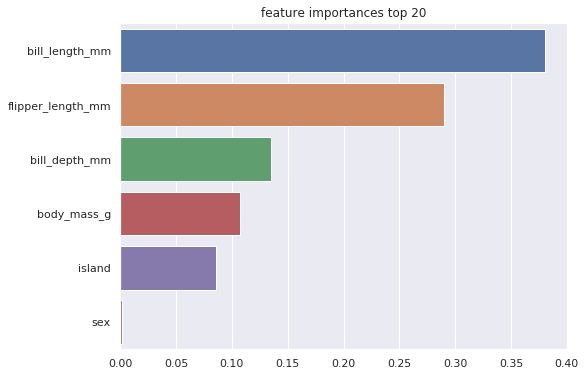

In [95]:
plt.figure(figsize=(8, 6))
plt.title("feature importances top 20")
sns.barplot(x=rf_top20.values, y=rf_top20.index)

#### grid_cv.best_estimator_를 이용한 결과 시각화

In [96]:
grid_cv.best_estimator_.fit(X_train, y_train)
y_hat = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_hat)

0.9552238805970149

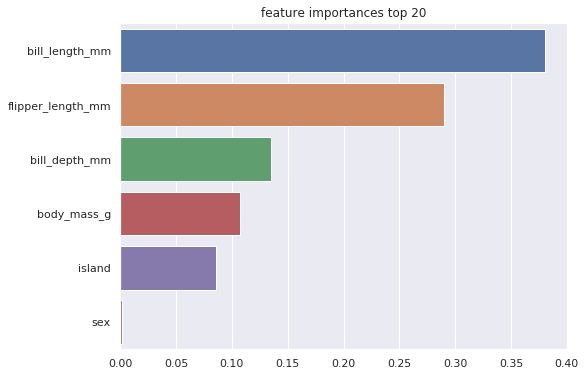

In [97]:
rf_importances = pd.Series(grid_cv.best_estimator_.feature_importances_, index=X.columns)
rf_top20 = rf_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title("feature importances top 20")
sns.barplot(x=rf_top20.values, y=rf_top20.index)

### BaggingClassifier - 다른 모델 1개를 bagging

In [98]:
# from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=100, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=156)
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)
clf.predict(X_test)

array([0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0])

## Boosting
- 초기 샘플 데이터를 조작하여 다수의 분류기를 생성하는 기법 중 하나
- 배깅과는 달리 순차적 방법
- 이전 분류기의 학습 결과를 토대로 다음 분류기의 학습 데이터의 새믈 가중치를 조장하여 학습 진행<br>
<br>
- 장점
   - 노이즈가 없는 데이터에 대해서는 매우 우수

- 단점
    - 과적합 문제로부터 자유롭지 못함

### Gradinet Boosting Machine
- AdaBoost와 유사하나, 가중치 업데이트를 경사하강법을 이용
- h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 업데이트

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=156)

In [100]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1]
}

In [101]:
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, n_jobs=-1, verbose=5)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 200]},
             verbose=5)

In [102]:
grid_cv.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [103]:
grid_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, random_state=0)

In [104]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_accuracy

0.9701492537313433

### XGBoost
- 앙상블 학습에서 가장 각광받고 있는 알고리즘

- 결측값 자체 처리
- GBM 대비 빠른 수행시간: 순차적으로 가중치를 증감하는 방법
- 자체 내장된 교차검증: 매 반복마다 내부적으로 최적화된 반복 수행
- 과적합규제(Regularization)
    - 자체 과적합 규제 가능
- 가지치기(Pruning)
    - GBM은 분할시 부정손실이 발생하면 분할 수행 중단. 많은 분할 발생
    - XGBoost는 max_depth 파라미터로 분할 깊이 조정 및 분할 수를 줄이는 것이 장점

#### eval dataset도 준비해야함

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=156)
X_train, V_test, y_train, v_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

In [106]:
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)

In [107]:
X.shape

(333, 6)

#### class 개수에 따라 loss 선택 주의!!

In [108]:
evals = [(V_test, v_test)]

# class > 2, mlogloss (multi-class logloss)
xgb_wrapper.fit(
    X_train, y_train,
    early_stopping_rounds=100, 
    eval_set=evals,
    eval_metric='mlogloss',
    verbose=0
)

XGBClassifier(n_estimators=300, objective='multi:softprob')

In [109]:
xgb_pred = xgb_wrapper.predict(X_test)
accuracy_score(xgb_pred, y_test)

1.0

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(V_test.shape)
print(v_test.shape)

(212, 6)
(212,)
(67, 6)
(67,)
(54, 6)
(54,)


In [111]:
xgb_pred = xgb_wrapper.predict(V_test)
accuracy_score(xgb_pred, v_test)

1.0

### LightGBM
- 더 빠른 학습과 예측 수행시간
- 더 작은 메모리 사용량
- categorical feature의 자동변환과 최적분할

#### eval dataset도 준비해야함

In [112]:
y.value_counts()

species
0          146
2          119
1           68
dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=156)
X_train, V_test, y_train, v_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

In [114]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

In [115]:
np.unique(v_test)

array([0, 1, 2])

In [116]:
#### params['metric']='binary_logloss' #metric for binary
#### params['metric']='multi_logloss' #metric for multi-class

In [117]:
evals = [(V_test, v_test)]
lgbm_wrapper.fit(
    X_train, y_train,
    early_stopping_rounds=100,
    eval_metric='multi_logloss',
    eval_set=evals,
    verbose=0
)

LGBMClassifier(n_estimators=400)

In [118]:
lgbm_pred = lgbm_wrapper.predict(X_test)
accuracy_score(y_test, lgbm_pred)

1.0

In [119]:
lgbm_wrapper.feature_importances_

array([ 367, 1033,  740,  439,  506,   67])

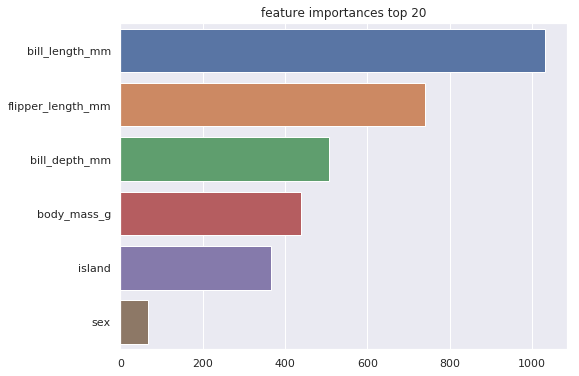

In [120]:
lgbm_importances = pd.Series(lgbm_wrapper.feature_importances_, index=X.columns)
lgbm_top20 = lgbm_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title("feature importances top 20")
sns.barplot(x=lgbm_top20.values, y=rf_top20.index)

# PCA
- 여러 차원으로 이루어지 데이터를 가장 잘 표현하는 축 찾는 것
    - 데이터를 잘 표현한다 = 분산이 넓은 축
    - Principal Component (PC, 주성분): 데이터에서 특이값 분해를 통해 추출된 고유벡터
    - 각 고유벡터는 서로 직교
        - 단점: 주성분이 어떤 컬럼인지 알 수 없음
- 과정
    - 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 정규화
    - 데이터들의 공분산을 계산
    - 공분산 행렬에 대해 특이값 분해를 수행하여 주성분(고유벡터)과 고유값 계산
    - 고유값의 크기와 비율을 보고 몇 개의 주성분을 선택할지 선택
    - 선택한 주성분으로 모든 데이터를 projection 시킴으로서 차원을 축소

### CAUTION
- PCA는 데이터셋의 평균이 0이라고 가정
- 그렇기 때문에 데이터를 원점에 맞추는 것을 잊지말아야함

## Component 개수 선택

0.95 이상이 되는 componet 수:  29


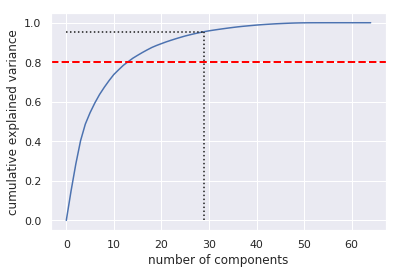

In [121]:
digits = load_digits()
data = digits.data
label = digits.target

pca = PCA()
# new_data = pca.fit_transform(data)
pca.fit(data)
new_data = pca.transform(data)
# 0을 추가해야 0 component라는 의미
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.append([0], cumsum)
d = np.argmax(cumsum >= 0.95)
print("0.95 이상이 되는 componet 수: ", d)
plt.plot(np.arange(len(cumsum)), cumsum)
plt.plot([d, d], [0, cumsum[d]], "k:")
plt.plot([0, d], [cumsum[d], cumsum[d]], "k:")

plt.axhline(0.8, 0, len(pca.components_), c='red', linestyle='--', linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# plt.xlim([0, len(cumsum)-1])
# plt.ylim([0, 1.04])
# # plt.gca().set_xlim(left=0)
# # plt.gca().set_ylim(bottom=0)
# plt.xlim(0)
# plt.ylim(0)

#### 주성분 2개로 전체 데이터 표현

before dimension:  (1797, 64)
after dimension:  (1797, 2)


Text(0, 0.5, 'component 2')

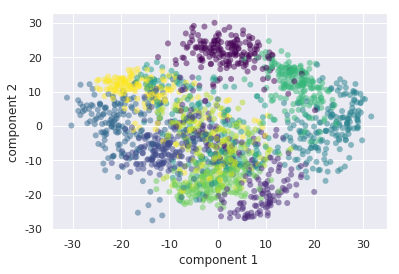

In [122]:
pca2 = PCA(n_components=2)
new_data2 = pca2.fit_transform(data)

print("before dimension: ", data.shape)
print("after dimension: ", new_data2.shape)

plt.scatter(new_data2[:, 0],
            new_data2[:, 1], 
            c=label, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')

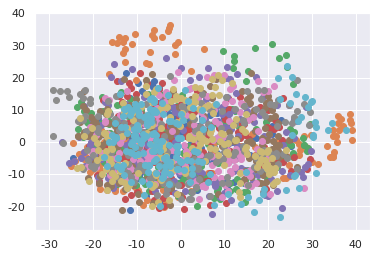

In [123]:
def show_pca(all_data, label, target):
    _data = all_data[label==target]
    pca = PCA(n_components=2)
    pca.fit(_data)
    transfomred = pca.transform(_data)
    plt.scatter(transfomred[:, 0], transfomred[:, 1]);
#     plt.axis()
#     plt.gca().set_aspect("scaled")
#     plt.gca().set_aspect("equal")
    
for i in range(10):
    show_pca(data, label, i)

## 학습 결과 비교

In [124]:
digits = load_digits()
data = digits.data
label = digits.target
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019)

### feature 29개 사용

In [125]:
scaler = StandardScaler()
pca = PCA(n_components=29)
model = RandomForestClassifier(random_state=2019)

pipeline = make_pipeline(scaler, pca, model)
clf_pca = pipeline.fit(X_train, y_train)
y_hat_pca = clf_pca.predict(X_test)
accuracy_score(y_test, y_hat_pca)

0.9638888888888889

### 모두 사용

In [126]:
scaler = StandardScaler()
model = RandomForestClassifier(random_state=2019)
pipeline = make_pipeline(scaler, model)
clf = pipeline.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_test, y_hat)

0.9694444444444444

### 압축을 위한 PCA

In [127]:
pca = PCA(n_components=29)
reduced = pca.fit_transform(data)
reduced.shape

(1797, 29)

In [128]:
recovered = pca.inverse_transform(reduced)
recovered.shape

(1797, 64)

In [129]:
def plot_digits(instances, images_per_row=5, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

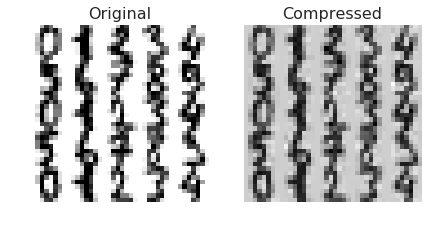

In [130]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(data[:25])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(recovered[:25])
plt.title("Compressed", fontsize=16)

# save_fig("mnist_compression_plot")

# Clustering

## Kmeans
- 각 클러스터에 할당된 데이터를 이용해 중심점을 반복적으로 업데이트하여 클러스터 형성
    - 1단계: 개별 포인트에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당<br>
    (거리 측정 방법: 유클리디안 거리, 맨하탄 거리)
    - 2단계: 할당된 클러스터를 기반으로 새로운 중심점을 계산함. 중심점은 클러스터 내부 점들 좌표의 산술평균이다.
    - 3단계: 각 클러스터의 할당이 바뀌지 않을 때까지 반복한다.

In [131]:
iris = sns.load_dataset('iris')
target = iris['species']
label = encoder.fit_transform(target)
data = iris.drop('species', axis=1)

In [132]:
feature = pd.concat([iris.sepal_length, iris.sepal_width], axis=1)

In [133]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=2019)
kmeans.fit(feature)

KMeans(n_clusters=3, random_state=2019)

In [134]:
predict = kmeans.predict(feature)
predict = pd.DataFrame(predict, columns=['predict'])

In [135]:
result = pd.concat([feature, predict], axis=1)
result

,sepal_length,sepal_width,predict
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


In [136]:
centers = kmeans.cluster_centers_
centers

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

In [137]:
centers = pd.DataFrame(centers, columns=['sepal_lenght', 'sepal_width'])
centers

,sepal_lenght,sepal_width
0,6.812766,3.074468
1,5.006000,3.428000
2,5.773585,2.692453


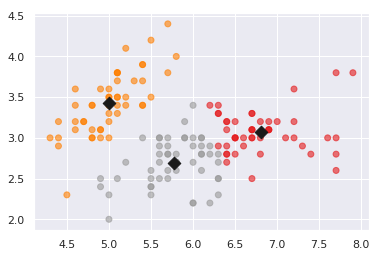

In [138]:
plt.scatter(result.sepal_length, result.sepal_width, c=result['predict'], alpha=0.6, cmap='Set1')
plt.scatter(centers.sepal_lenght, centers.sepal_width, s=80, marker='D', c='k')
plt.show()

###### Kmeans 결과 판단

In [139]:
# pd.crosstab(label, result['predict'])
pd.crosstab(target, result['predict'])

predict,0,1,2
species,,,
setosa,0,50,0
versicolor,12,0,38
virginica,35,0,15


## scaling 후에 결과는 어떻게 다른가?

In [140]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)

In [141]:
pipeline.fit(feature)
pred_std_scaled = pipeline.predict(feature)
pred_std_scaled_df = pd.DataFrame(pred_std_scaled, columns=['predict'])

In [142]:
result_std_scaled = pd.concat([feature, pred_std_scaled_df], axis=1)
result_std_scaled.head()

,sepal_length,sepal_width,predict
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [143]:
pd.crosstab(target, result_std_scaled.predict)

predict,0,1,2
species,,,
setosa,49,0,1
versicolor,0,15,35
virginica,0,34,16


In [144]:
feature_scaled = scaler.fit_transform(feature)
kmeans_scaled = KMeans(n_clusters=3, max_iter=300, random_state=2019)

kmeans_scaled.fit(feature_scaled)
pred_scaled = kmeans_scaled.predict(feature_scaled)

In [145]:
centers_scaled = kmeans_scaled.cluster_centers_
centers_scaled

array([[-0.04825457, -0.89526349],
       [-0.97822861,  0.90390597],
       [ 1.20144049,  0.13569118]])

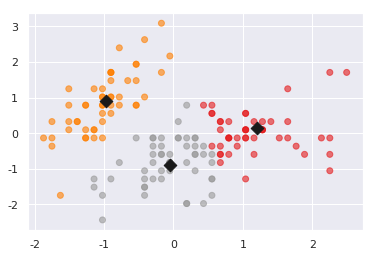

In [146]:
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=result['predict'], alpha=0.6, cmap='Set1')
plt.scatter(centers_scaled[:, 0], centers_scaled[:, 1], s=80, marker='D', c='k')
plt.show()

In [147]:
# scale 안했을 떄
pd.crosstab(target, result['predict'])

predict,0,1,2
species,,,
setosa,0,50,0
versicolor,12,0,38
virginica,35,0,15


In [148]:
# scale 했을 때
pd.crosstab(target, result_std_scaled['predict'])

predict,0,1,2
species,,,
setosa,49,0,1
versicolor,0,15,35
virginica,0,34,16


# Kmeans : scaled vs not scaled
## 실루엣 계수
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리 돼있는지를 나타낸다.
- 효율적으로 잘 분리 됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다.

- 실루엣 계수는 -1 에서 1사이의 값을 갖음
- 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 의미
- 0에 가까울 수록 근처의 군집과 가까워 진다는 의미
- -1은 다른 군집에 할당됐다는 의미

In [149]:
print("scaled: ", silhouette_score(feature, result_std_scaled.predict))
print("not scaled: ",silhouette_score(feature, result.predict))
print("스케일링한 것이 군집이 더 잘됨")

scaled:  0.43016022299326406
not scaled:  0.4450525692083638
스케일링한 것이 군집이 더 잘됨


## 적합한 n_clusters 찾기
- inertia: 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- inertia 값이 낮을수록 군집화가 더 잘 됐다고 볼 수 있다.

In [150]:
ks = range(1, 10)
inertia_list = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertia_list.append(model.inertia_)

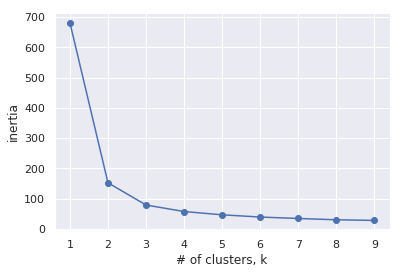

In [151]:
plt.plot(ks, inertia_list, '-o')
plt.xlabel('# of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

---

# 데이터 분할

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

##  1. train_test_split

In [153]:
# shuffle=False 일 때, stratify 안됨
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.2, random_state=2019)

## 2. K-fold

Fold 개수대로 score 계산

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2019)

# y.values.ravel() -> make 1D
# y should be 1D
scores = cross_val_score(rf, X, y.values.ravel(), cv=5)
print(scores)
print(scores.mean())

[1.         0.97014925 0.98507463 0.98484848 1.        ]
0.9880144730891001


In [155]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2019)
scores = cross_validate(rf, X, y.values.ravel(), cv=3, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.106197,0.010462,0.990991,1.0
1,0.099451,0.010705,0.990991,1.0
2,0.098791,0.010365,1.000000,1.0


### cross_validate: 모델도 볼 수 있음

In [156]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2019)
result = cross_validate(rf, X, y.values.ravel(), cv=10, return_estimator=True, return_train_score=True)
# result

### index 출력 방법

In [157]:
# shuffle=True 일 때만, random_state 설정 가능
kf = KFold(n_splits=5, shuffle=True, random_state=10)
for x_index, y_index in kf.split(X, y):
#     예시
#     print(x.iloc[x_index])
#     print(y.iloc[y_index])

#     X_train = x.iloc[x_index]
#     y_train = y.iloc[y_index]
    pass

## 3. Stratified K-fold

In [158]:
# shuffle=True 일 때만, random_state 설정 가능

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for x_index, y_index in kf.split(X, y):
#     print(x.iloc[x_index])
#     print(y.iloc[y_index])
    pass

## cross validation 학습 예시

In [159]:
k_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2019)
kfold = KFold(n_splits=5)
kfold_score = cross_val_score(k_rf, X, y.values.ravel(), cv=kfold)
print(kfold_score)

sk_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2019)
skfold = StratifiedKFold(n_splits=5)
skfold_score = cross_val_score(sk_rf, X, y.values.ravel(), cv=skfold)
print(skfold_score)

[0.97014925 0.94029851 0.91044776 1.         1.        ]
[1.         0.97014925 0.98507463 0.98484848 1.        ]


# GridSearchCV

In [160]:
from sklearn.model_selection import GridSearchCV
# log_reg = LogisticRegression()
# params = { "C": np.linspace(1, 10, 10), "max_iter": np.arange(1000, 5000, 100) }

rf = RandomForestClassifier()
params = {
    'n_estimators':[300],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

clf = GridSearchCV(rf, param_grid=params, cv=5, verbose=0, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [300]})

In [161]:
clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 300}

In [162]:
y_hat = clf.predict(X_test)

# Confusion matrix 

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### binary

In [164]:
y_binary = y[y.species!=2]
X_binary = X.iloc[y_binary.index]
y_binary.value_counts()

species
0          146
1           68
dtype: int64

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=2019)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train.values.ravel())
y_hat = clf.predict(X_test)

In [167]:
y_hat = clf.predict(X_test)

In [168]:
confusion_matrix(y_test, y_hat)

array([[28,  0],
       [ 0, 15]])

In [169]:
recall_score(y_test, y_hat)

1.0

In [170]:
precision_score(y_test, y_hat)

1.0

In [171]:
accuracy_score(y_test, y_hat)

1.0

In [172]:
print(classification_report(y_test, y_hat, ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        15

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [173]:
# np.round(clf.predict_proba(X_test), 3)

In [174]:
# clf.predict(X_test)

# ROC curve

In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [176]:
from sklearn.datasets import make_classification
data_X, cls_lab = make_classification(n_samples=2100, n_classes=2, weights=[1,1], random_state=2)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.5, random_state=2)

0.9879282627077126


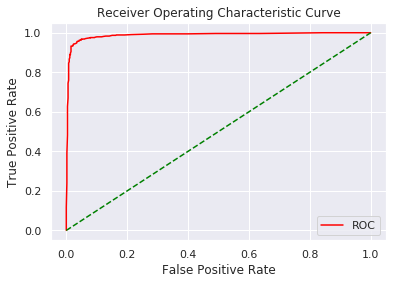

In [177]:
model = RandomForestClassifier()
model.fit(train_X, train_y)

prob = model.predict_proba(test_X)
prob = prob[:, 1]

fper, tper, thresholds = roc_curve(test_y, prob)
print(roc_auc_score(test_y, prob))

plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

### multi-class일 경우

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [179]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_hat = clf.predict(X_test)

In [180]:
y_hat = clf.predict(X_test)

In [181]:
cnf_maxtix = confusion_matrix(y_test, y_hat)
cnf_maxtix

array([[22,  1,  0],
       [ 0, 17,  0],
       [ 0,  0, 27]])

In [182]:
print(classification_report(y_test, y_hat, ))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        27

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



---

# 통계분석

# 모수통계 

## t-test
- 모집단의 표준편차를 모르고 n <= 30 일 때,
    - 표본의 표준편차를 이용해서 표본의 표준편차로 표준화를 하면 t 분포를 따름
    - 표본에서 구한 분산(또는 표준편차)로 표준화를 하면 t-value 값이 되고, 이를 통해 검증하므로 t-test라고 함
    

## z-test
- 모집단의 표준편차를 알 때 (n은 상관없음)
- 모집단의 표준편차를 모르고 n > 30일 때,

## Independent sample t-test

### 독립적인 2개의 집단의 평균 차이가 있는지를 검정

유의수준(알파)이 0.05일 때,

1. 귀무가설: 두 모집단의 평균 차이는 없다.    
    - if p-value > 0.05, 통계적으로 의미 없음
    - 귀무가설 채택


2. 대립가설: 두 모집단의 평균 차이는 있다.
    - if p-value < 0.05, 통계적으로 유의미함
    - 대립가설 채택

In [183]:
import pandas as pd
import numpy as np

In [184]:
dat_M = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
dat_F = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

In [185]:
import scipy.stats

In [186]:
scipy.stats.ttest_ind(dat_M, dat_F, equal_var=False)

Ttest_indResult(statistic=-2.670573872669349, pvalue=0.01108318824471652)

## t-test 결과 보고
- 효과크기
: 0.2정도면 작은편, 0.5면 중간, 0.8이면 큰편

#### Cohen's D

In [187]:
m = scipy.stats.ttest_ind(dat_M, dat_F, equal_var=False)
m.statistic

-2.670573872669349

In [188]:
t = m.statistic
df = len(dat_M) + len(dat_F) - 2

abs(t) / np.sqrt(df)

0.4332242888591059

#### Pearson's R

In [189]:
t2 = t ** 2

np.sqrt(t2 / (t2 + df))

0.39752319599996255

## Paired t-test
### 쌍으로 이루어진 집단의 평균 차이가 있는지를 통계적으로 검정. 두 집단의 자료의 개수가 동일해야함

유의수준(알파)이 0.05일 때,

1. 귀무가설: 두 모집단의 평균 차이는 없다.    
    - if p-value > 0.05, 통계적으로 의미 없음
    - 귀무가설 채택


2. 대립가설: 두 모집단의 평균 차이는 있다.
    - if p-value < 0.05, 통계적으로 유의미함
    - 대립가설 채택

In [190]:
dat_M = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
dat_F = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

In [191]:
import scipy.stats

In [192]:
scipy.stats.ttest_rel(dat_M, dat_F)

Ttest_relResult(statistic=-2.9868874599588247, pvalue=0.007578486289181322)

## 카이제곱 검정 (교차분석, 빈도분석)
- 관찰된 빈도수의 기댓값과 얼마나 다른지 확인
- 귀무가설: 분할표의 행과 열은 독립이다.
- 연구가설: 분할표의 행과 열은 독립이 아니다.

In [193]:
import pandas as pd

In [194]:
data = pd.read_csv("./statistics/housetask.txt", sep='\t', index_col=0)
data

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


In [195]:
import scipy.stats

In [196]:
chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(data)
print("test statistic:", chi2)
print("p-value:", pvalue)
print("degree of freedom:", dof)
print("expected:", expected)

test statistic: 1944.4561959955277
p-value: 0.0
degree of freedom: 36
expected: [[60.55045872 25.63302752 38.44954128 51.36697248]
 [52.63761468 22.28325688 33.42488532 44.65424312]
 [37.1559633  15.7293578  23.5940367  31.5206422 ]
 [48.16513761 20.38990826 30.58486239 40.86009174]
 [41.97247706 17.76834862 26.65252294 35.60665138]
 [38.87614679 16.45756881 24.68635321 32.97993119]
 [41.28440367 17.47706422 26.21559633 35.02293578]
 [33.02752294 13.98165138 20.97247706 28.01834862]
 [47.82110092 20.24426606 30.36639908 40.56823394]
 [38.87614679 16.45756881 24.68635321 32.97993119]
 [47.82110092 20.24426606 30.36639908 40.56823394]
 [56.76605505 24.0309633  36.04644495 48.1565367 ]
 [55.04587156 23.30275229 34.95412844 46.69724771]]


# 결과해석
- p-value < 0.05이므로, 대립가설 채택
- 즉, 집안일의 종류와 수행하는 사람은 독립이 아님

# 피셔의 정확검정
- 서로의 빈도 수 차이가 많이 나는 경우 사용하는 검정

In [197]:
import pandas as pd
from scipy.stats import fisher_exact

In [198]:
data2 = pd.DataFrame([[1, 6], [5, 2]])
data2.columns = ['가짜 약','진짜 약']
data2.index = ['효과있음', '효과없음']
data2

,가짜 약,진짜 약
효과있음,1,6
효과없음,5,2


### p-value > 0.05 이므로 약의 유효성은 없다

In [199]:
oddsratio, pvalue = fisher_exact(data2)
print("oddratio:", oddsratio, "\n"
        "p-value:", pvalue )

oddratio: 0.06666666666666667 
p-value: 0.10256410256410275


# 자유도에 따른 chi-squre 그래프

In [200]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

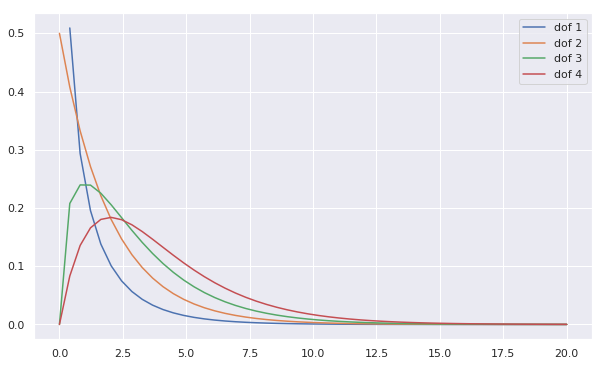

In [201]:
x = np.linspace(0, 20, 50)
plt.figure(figsize=(10, 6))

for dof in range(1, 5):
    y = chi2(dof).pdf(x)
    plt.plot(x, y, label="dof {}".format(dof))
plt.legend()
plt.show()

# ANOVA
### 집단이 3개 이상일 때, 집단 간 평균 차이가 있는지 검정

- factor: 요인. 집단을 구별하는 변수. ex) 성별, 국가
- level: 요인의 수준(집단). 각 집단을 의미. ex) factor가 성별이었다면, level은 남, 여

# One-way ANOVA
### 요인이 1개면서 수준이 3개 이상인 분산분석. (집단을 구별하는 변수가 1개)
유의수준(알파)이 0.05일 때,

- 귀무가설: 모든 집단의 평균은 동일하다. 평균 차이가 없다.
    - if p-value > 0.05, 통계적으로 의미 없음


- 대립가설: 적어도 한 집단의 평균이 다른 집단들의 평균과 다르다.
    - if p-value < 0.05, 통계적으로 유의미함

## 가정
- 독립성: 자료의 추출은 독립적으로 이루어짐
- 정규성: 자료의 모집단의 분포는 정규분포
- 등분산성: 모든 모집단의 모분산은 동일

#### 데이터 준비

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv('./statistics/onewayanova.txt', sep='\t')
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [204]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.rename(columns={'variable':'treatments'}, inplace=True)
df_melt.drop(columns=['index'], inplace=True)
df_melt.head()

,treatments,value
0,A,25
1,A,30
2,A,28
3,A,36
4,A,29


### 집단간 샘플 개수가 같은지 확인

In [205]:
df_melt.groupby('treatments').agg(len)

,value
treatments,
A,5
B,5
C,5
D,5


### 1. 정규성 확인
- Sahpiro test: if p-value > alpha, 정규성 만족(정규분포 따름)
- Q-Q plot으로 확인

In [206]:
import scipy.stats

In [207]:
for _tr in df_melt.treatments.unique():
    # stat: 검정통계치
    stat, p = scipy.stats.shapiro(df_melt['value'][df_melt['treatments']==_tr])
    print("Normality of group {0} -> statistics: {1:.2f}, p-value: {2:.2f}".format(_tr, stat, p))

Normality of group A -> statistics: 0.93, p-value: 0.61
Normality of group B -> statistics: 0.93, p-value: 0.57
Normality of group C -> statistics: 0.95, p-value: 0.76
Normality of group D -> statistics: 0.94, p-value: 0.70


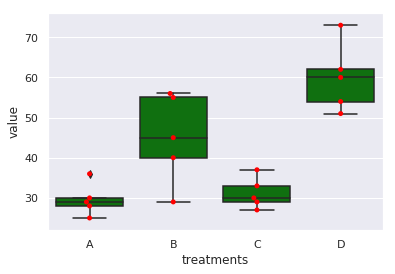

In [208]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='green')
ax = sns.swarmplot(x='treatments', y='value', data=df_melt, color='red')
plt.show()

### 2. 독립성 확인
- random sampling인지 확인

### 3. 등분산성 확인
- Levene test: if p-value > 0.05, 집단의 분산이 모두 같다. 즉, 등분산성 만족
- box test

In [209]:
scipy.stats.levene(
    df_melt['value'][df_melt['treatments']=='A'],
    df_melt['value'][df_melt['treatments']=='B'],
    df_melt['value'][df_melt['treatments']=='C'],
    df_melt['value'][df_melt['treatments']=='D'] )

LeveneResult(statistic=1.9219593192195938, pvalue=0.16673281219949276)

In [210]:
scipy.stats.bartlett(
    df_melt['value'][df_melt['treatments']=='A'],
    df_melt['value'][df_melt['treatments']=='B'],
    df_melt['value'][df_melt['treatments']=='C'],
    df_melt['value'][df_melt['treatments']=='D'] )

BartlettResult(statistic=5.687843565012841, pvalue=0.1278253399753447)

## one-way anova 첫번째 방법

In [211]:
from scipy.stats import stats

In [212]:
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


## one-way anova 두번째 방법

In [213]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [214]:
model = ols('value ~ C(treatments)', df_melt).fit()

In [215]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


## 사후분석(post-hocs)
- 대립가설을 채택할 때(평균이 차이가 있는 집단이 적어도 한 개 존재), 구체적으로 어떤 수준(level)들이 차이가 있는지 확인
- 반드시 동질성이 확보되어야함(Levene 방법 사용)

## Family-wise Error Rate
- 여러 개의 가설 검정을 할 때 적어도 하나의 가설에서 1종 오류가 발생할 가능성
- 가설검정을 많이 할 수록 FWER은 증가
- 유의수준 5%에서 가설 검정을 1번 할 때, 1종 오류가 발생하지 않을 확률은 95%. FWER = 100% - 95% = 5%
- 가설검정을 2번했을 때, 2번 모두 1종 오류가 발생하지 않을 확률은 95% × 95% = 90.25%. FWER = 9.75%
- 가설검정을 3번했을 때, 3번 모두 1종 오류가 발생하지 않을 확률은 95% × 95% × 95% = 85.74%. FWER = 14.26%

### 방법

#### 1. 집단별 표본의 수와 분산이 동일한 경우
    - ** Tukey's HSD (Honestly Significant Difference) - 비교 대상 표본수가 동일하여야함. 표본수가 동일한 경우 가장 많이 사용되는 사후검정 기법
    
    
#### 2. 집단별 표본의 수는 다르지만 분산의 동일한 경우
    - Scheffe - 지나치게 보수적으로 엄격하게 사후검정 수행. 통계적으로 유의미한 차이를 도출하기 쉽지 않으므로 잘 사용하지 않으나 2번에서는 추천
    - Fisher's LSD (Least Significant Difference) - 오차비율을 통제하지 않아 상대적으로 엄격하지 않은 기준으로 사후 검정(1종 오류 발생확률을 통제하지 않음)
    
    
#### 3. 집단별 표본의 수도 다르고 분산의 동질성도 확보되지 않은 경우
    - Games-Howell


---

** Bonferroni's correction
- 모수, 비모수에 모두 적용 가능
- 엄격함의 정보로 봤을 때, Tukey < Bonferroni < Scheffe
- 그러나 비교대상이 많을수록 검정력이 약해짐


### Bonferroni correction

In [216]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

In [217]:
comp = MultiComparison(df_melt.value, df_melt.treatments)

- if p-value < 0.05, 두 수준(집단)의 평균 차이만 유의함
- reject column으로 확인

In [218]:
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
A,B,-2.8918,0.0201,0.1209,False
A,C,-0.6375,0.5416,1.0,False
A,D,-7.2136,0.0001,0.0005,True
B,C,2.6015,0.0315,0.1893,False
B,D,-2.3837,0.0443,0.2658,False
C,D,-6.8767,0.0001,0.0008,True


### 집단별 표본의 수와 분산이 동일한 경우 - Tukey's HSD

In [219]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [220]:
hsd = pairwise_tukeyhsd(df_melt['value'], df_melt['treatments'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,15.4,0.0251,1.6929,29.1071,True
A,C,1.6,0.9,-12.1071,15.3071,False
A,D,30.4,0.001,16.6929,44.1071,True
B,C,-13.8,0.0482,-27.5071,-0.0929,True
B,D,15.0,0.0296,1.2929,28.7071,True
C,D,28.8,0.001,15.0929,42.5071,True


### Tukey's HSD 두번째 방법

In [221]:
import scikit_posthocs as sp
sp.posthoc_tukey_hsd(df_melt.value, df_melt.treatments)

,A,B,C,D
A,1,1,0,1
B,1,1,1,1
C,0,1,1,1
D,1,1,1,1


### 집단별 표본의 수는 다르지만 분산의 동일한 경우 - Scheffe

In [222]:
import scikit_posthocs as sp

In [223]:
# 각각의 값이 집단간 p-value
# p-value < 0.05인 집단은 평균의 차이가 있음이 통계적으로 유의함
sp.posthoc_scheffe(df_melt, val_col='value', group_col='treatments')

,A,B,C,D
A,1.000000,0.041964,0.990037,0.000123
B,0.041964,1.000000,0.075779,0.048766
C,0.990037,0.075779,1.000000,0.000224
D,0.000123,0.048766,0.000224,1.000000


# two-way ANOVA
- 집단을 구분하는 변수(=요인)이 2개일 때, 요인 간 상호작용을 파악하기 위함. (요인의 개수가 2개(=열이 2개)면 two-way anova인듯?)
- 요인이 n개면 n-way ANOVA

# one-way ANOVA 비교
- 상호작용 효과를 분석하는게 중요
- 상호작용 효과가 유의미한 경우(p-value < 0.05) 단순효과분석 결과를 상세하게 첨부

# 주요 용어
- 주 효과: 다른 요인(집단구분 변수)과 상관없이, 한 요인의 수준(집단)에 따라 효과가 유의미하게 달라질 때, '주효과'가 있다고 함
- 상호작용 효과: 한 요인의 수준에 따른 효과의 차이가 또 다른 요인의 수준에 따라달라질 때, '요인들 간 상호작용(효과)'이 존재한다고 함

# 균형설계 vs 비균형설계

- 균형설계: 각 집단/조건별 표본수가 동일한 경우
- 비균형설계: 각 집단/조건별 표본수가 동일하지 않은 경우
- 균형설계와 비균형설계에 따라 계산 방법이 다름

## 데이터 준비

- 독립변수 - poison, treat
- 종속변수 - time (연속형)

In [224]:
import pandas as pd

In [225]:
df = pd.read_csv("./statistics/poison.csv", index_col=0)
print(df.head(), end='\n\n')
print("poison의 레벨: {}\ntreat의 레벨: {}".format(df.poison.unique(), df.treat.unique()))

   time  poison treat
1  0.31       1     A
2  0.45       1     A
3  0.46       1     A
4  0.43       1     A
5  0.36       2     A

poison의 레벨: [1 2 3]
treat의 레벨: ['A' 'B' 'C' 'D']


## 균형설계 확인
- 요인1(poison)의 샘플 수가 모두 동일한가?
- 요인2(treat)의 샘플 수가 모두 동일한가?
- 요인1과 요인2에 대해서 종속변수의 샘플수가 모두 동일한가?

In [226]:
# poision 요인으로 구분한 집단별 표본 수가 모두 동일한가?
df.groupby('poison').agg(len)

,time,treat
poison,,
1,16.0,16
2,16.0,16
3,16.0,16


In [227]:
# treat 요인으로 구분한 집단별 표본 수가 모두 동일한가?
df.groupby('treat').agg(len)

,time,poison
treat,,
A,12.0,12
B,12.0,12
C,12.0,12
D,12.0,12


In [228]:
# poison, treat 요인으로 구분한 각 집단별 표본수가 모두 동일한가?
df.groupby(['treat', "poison"]).agg(len)

time
treat poison      
A     1        4.0
      2        4.0
      3        4.0
B     1        4.0
      2        4.0
      3        4.0
C     1        4.0
      2        4.0
      3        4.0
D     1        4.0
      2        4.0
      3        4.0

# two-way anova 실시

In [229]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [230]:
model = ols('time ~ C(poison) * C(treat)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(poison),2.0,1.033012,0.516506,23.221737,3.331440e-07
C(treat),3.0,0.921206,0.307069,13.805582,3.777331e-06
C(poison):C(treat),6.0,0.250138,0.041690,1.874333,1.122506e-01
Residual,36.0,0.800725,0.022242,NaN,NaN


# 결과 해석

- poison: F(2, 36) = 23.222, p < 0.05로 유의미. 즉 poison의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- treat: F(3, 36) = 13.806, p < 0.05로 유의미. 즉 treat의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- poison:treat: F(6, 36) = 1.874, p > 0.05로 유의미하지 않음. 상호작용 효과는 발견하지 못함


# 결과 보고 예시 - 상호작용이 유의미하지 않은 경우

time에 대하여 poison과 treat를 요인으로 하는 이원분산분석을 실시한 결과,

poison의 주효과는 유의미하였으며(F(2, 36) = 23.222, p < 0.05),

treat의 주효과 또한 유의미하였으나(F(3, 36) = 13.806, p < 0.05), 

poison과 treat의 유의미한 상호작용효과는 발견할 수 없었다(F(6, 36) = 1.874, p > 0.05).


---

# 비균형자료의 이원분산분석

In [231]:
import pandas as pd
dat = pd.read_csv('./statistics/poison.csv', index_col=0)

In [232]:
dat2 = dat.loc[1:,:]  # 데이터의 첫 행을 제거하여 비균형으로 만듬. 집단 별 표본수가 동일하지 않으므로 비균형설계자료

In [233]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', dat2).fit()
anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.680625,1.0,30.600393,0.000003
C(poison),0.082217,2.0,1.848200,0.172157
C(treat),0.453950,3.0,6.803085,0.000947
C(poison):C(treat),0.250137,6.0,1.874333,0.112251
Residual,0.800725,36.0,NaN,NaN


In [234]:
# 변수를 바꿔도 결과는 동일
model = ols('time ~ C(treat) * C(poison)', dat2).fit()
anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.680625,1.0,30.600393,0.000003
C(treat),0.453950,3.0,6.803085,0.000947
C(poison),0.082217,2.0,1.848200,0.172157
C(treat):C(poison),0.250137,6.0,1.874333,0.112251
Residual,0.800725,36.0,NaN,NaN


# 결과 해석
- treat만 p < 0.05 이므로 통계적으로 유의미하다

# 결과 보고 예시 - 상호작용효과가 유의미한 경우

poison과 treat의 유의미한 상호작용 효과에 대하여 단순효과분석을 실시한 결과,

poison이 1인 집단에서는 treat의 단순 주효과는 유의미하였고(F(3,36) = 6.8031, p < 0.05), 

poison이 2인 집단도 treat의 단순 주효과는 유의미하였으나(F(3,36) = 10.0367, p < 0.05), 

poison이 3인 집단에서는 treat의 단순 주효과가 유의미하지 않았다(F(3,36) = 0.7145, p > 0.05).

# MANOVA

- 여러 변인들의 효과를 동시에 분석하기에 종속변인에 대한 효과가 여러 변인들간의 선형조합으로 해석된다.
- 조건
    - 종속변수 2개 이상, 연속형
    - 독립변수가 적어도 2개 이상

- 귀무가설: 모든 평균들의 차이는 없다.
- 대립가설: 평균들의 차이가 있다. (p-value < 0.05)

In [235]:
heartopt = pd.read_csv('./statistics/heartopt.csv')
heartopt

,age,gender,clotsolv,proc,los,cost,lnlos,lncost
0,63,1,2,1,4,27.94,1.386294,3.330059
1,67,0,2,1,4,30.93,1.386294,3.431727
2,74,0,1,2,7,44.38,1.945910,3.792789
3,69,0,3,1,4,36.31,1.386294,3.592093
4,54,1,3,2,5,40.48,1.609438,3.700808
...,...,...,...,...,...,...,...,...
1476,63,0,2,2,6,42.16,1.791759,3.741472
1477,68,1,3,2,6,40.33,1.791759,3.697096
1478,76,1,3,1,5,41.65,1.609438,3.729301
1479,65,1,3,1,4,27.84,1.386294,3.326474


In [236]:
heartopt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1481 non-null   int64  
 1   gender    1481 non-null   int64  
 2   clotsolv  1481 non-null   int64  
 3   proc      1481 non-null   int64  
 4   los       1481 non-null   int64  
 5   cost      1481 non-null   float64
 6   lnlos     1481 non-null   float64
 7   lncost    1481 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 92.7 KB


In [237]:
# 혈전 종류
heartopt.clotsolv = heartopt.clotsolv.astype('str')
# 수술 방법
heartopt.proc = heartopt.proc.astype('str')
heartopt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1481 non-null   int64  
 1   gender    1481 non-null   int64  
 2   clotsolv  1481 non-null   object 
 3   proc      1481 non-null   object 
 4   los       1481 non-null   int64  
 5   cost      1481 non-null   float64
 6   lnlos     1481 non-null   float64
 7   lncost    1481 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.7+ KB


In [238]:
from statsmodels.multivariate.manova import MANOVA
# formaular: 종속변수 ~ 독립변수
# 독립변수 clotsolv + proc
# 종속변수 los + cost
maov = MANOVA.from_formula('los + cost ~ clotsolv + proc', data=heartopt)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.2165 2.0000 1476.0000 2670.4628 0.0000
         Pillai's trace 0.7835 2.0000 1476.0000 2670.4628 0.0000
 Hotelling-Lawley trace 3.6185 2.0000 1476.0000 2670.4628 0.0000
    Roy's greatest root 3.6185 2.0000 1476.0000 2670.4628 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          clotsolv        Value  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.9745 4.0000 2952.0000  9.6110 0.0000
           Pillai's trace 0.0255 4.0000 2954.

MANOVA 해석
- 모든 독립변수의 p-value < 0.05 이므로, 모델에 영향을 미친다. 즉, 평균 차이가 있다.

---

# 비모수통계
- 적합도 검정
    - 관측치가 무작위로 추출 되었는가? Run-test
    - 관측치가 정규분포인가? Kolmogorov-Smirnov tes
    
    
- 동질성 검정
    - 전, 후 평균 차이가 있는가? Wilcoxon signed ranks test
    - 2개의 독립집단의 평균 차이가 있는가? Mann-Whitney U test
    - 3개 이상의 독립 표본 집단간 분포가 동일한가? Kruskal-Wallis H test
    - 실험의 효과 검증? Friedman test


- 상관성 검정: 연관성이 있는가 없는가?
    - 스피어만 서열상관분석
    - 피어슨 서열상관분석
    - 정준상관분석 (x)
    - Kendall rank correlation coefficient

## 적합도 검정

### Run test
관측치가 무작위로 추출되었는지를 판단
- 귀무가설: 무작위로 추출되었다.
- 대립가설: 무작위가 아니다. (p-value < 0.05)

In [239]:
from statsmodels.sandbox.stats.runs import Runs
import numpy as np

### 적합도 검정

In [240]:
x = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0]
x = np.array(x)

statistic, pvalue = Runs(x).runs_test()
print(statistic)
print(pvalue)

-1.8277470669267506
0.06758752074917526


결과해석
- 유의수준 0.05라면, p-value > 0.05 이므로 귀무가설 채택. 즉, 무작위로 추출되었다.
- 유의수준 0.1이라면, p-value < 0.1 이므로 귀무가설 기각. 즉, 무작위로 추출되지 않았다.

### Kolmogorov-Smirnov test
관측치가 가정한 분포와 적합한지 검정.

ex) 가정한 분포가 정규분포라면
- 귀무가설: 관측치의 분포는 정규분포이다.
- 대립가설: 관측치의 분포는 정규분포가 아니다.

In [241]:
from statsmodels.stats.diagnostic import kstest_normal
import numpy as np 

x = [88, 75, 79, 84, 68, 51, 70, 75, 88, 90, 92, 88, 63, 72, 94, 80, 78, 98, 81, 67, 85, 87, 79, 81, 85, 48, 79, 86, 53, 100, 
     87, 80, 80, 32, 60, 75, 62, 82, 40, 57]
x = np.array(x)

# dist: norm or exp
kstest_normal(x, dist='norm')

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


(0.16508249090030575, 0.007697422359967707)

결과해석

- 유의수준이 0.05일때, p-value < 0.05이므로 귀무가설 기각. 즉, 관측치는 정규분포를 따르지 않는다.

## 동질성 검정

### Wilcoxon signed ranks test
paired sample t-test에서 n < 30일 경우에 사용

ex) 기존 물류 알고리즘 보다 개선되었다고 알려진 새로운 물류 경로 알고리즘을 도입해 배송시간을 단축하고자 한다.
    - 귀무가설: 기존과 신규의 배송시간 평균 차이는 없다.
    - 대립가설: 기존과 신규의 배송시간 평균 차이가 있다.

In [242]:
from scipy.stats import wilcoxon

In [243]:
x = [10, 30, 9, 21, 35, 12, 17, 14, 15, 16]
y = [8, 27, 16, 25, 30, 13, 11, 21, 13, 34]

wilcoxon(x, y)

WilcoxonResult(statistic=22.0, pvalue=0.5745648243125437)

특정 평균을 검정하고 싶으면 아래처럼 사용

In [244]:
# wilcoxon(data - mu, alternative="...")

결과해석
- 유의수준 0.05일때, p-value > 0.05 이므로 귀무가설 채택. 즉, 새로운 알고리즘의 배송시간과 차이가 없다.

### Mann-Whitney U test
- 2개의 독립된 집단간의 특정 값의 평균 비교
- 2개의 독립된 집단이 정규분포를 따르지 않을 때 사용한다.

ex) 반도체 회사V에서는 공장A와 공장B에서 반도체를 생산하고 있다. 이 때, 2개의 공장의 생산 효율에 차이가 있는지를 확인하고 싶다.
    - 귀무가설: 두 공장의 생산효율의 차이가 없다.
    - 대립가설: 두 공장의 생산효율의 차이가 있다. (다르다. 그러나 어느 공장이 더 낫다는 검정으로 알 수 없음)

In [245]:
from scipy.stats import mannwhitneyu
import pandas as pd

In [246]:
x = [12, 11, 13, 14, 15]
y = [16, 15, 17, 19, 20]

In [247]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=0.5, pvalue=0.007985348176890053)

결과해석

- 유의수준 0.05일때, pvalue < 0.05 이므로 귀무가설 기각. 즉, 차이가 있다.

In [248]:
xy = pd.DataFrame(x+y, columns=['생산량'])
xy['공장이름'] = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
xy['생산량 순위'] = xy['생산량'].rank(ascending=False)
print(xy.groupby('공장이름').mean())

       생산량  생산량 순위
공장이름              
A     13.0     7.9
B     17.4     3.1


결과해석
- 실제 순위를 매겨보니 B가 낫다.

### Kruskal-Wallis H test
- 3개 이상의 독립 표본 집단간 분포가 동일한지 검정
    - 귀무가설: 집단 간 분포는 동일하다.
    - 대립가설: 집단 간 분포는 동일하지 않다.

In [249]:
import pandas as pd
from scipy.stats import kruskal

a = [35, 41, 45, 42, 33, 36, 47, 45, 31, 32, 40, 44]
b = [40, 38, 44, 48, 45, 46, 42, 39, 40, 41, 38, 47]
c = [30, 34, 38, 39, 40, 41, 38, 37, 40, 41, 39, 38]

In [250]:
kruskal(a, b, c)

KruskalResult(statistic=6.047476974964328, pvalue=0.04861911622342764)

결과해석
- 유의수준 0.05일 때, p-value < 0.05이므로 귀무가설을 기각할 수 있다. 따라서 3개의 집단의 분포는 동일하지 않다.

### Friedman test

- 실험유형과 집단유형으로 구분된 여러 집단들의 서열정보를 사용하여 실험효과를 검증하는 방법

ex)

- A쇼핑 본사에서는 멤버십 VIP 고객들을 대상으로 새로운 혜택을 제공하고자 한다.<br>
샘플증정, 포인트 추가, 무료배송, 할인쿠폰 등 4가지 혜택에 대한 5개 지역별 고객들에 대한 사전 선호도 조사를 실시하였다.
    - 귀무가설: 혜택별 고객 선호도 평가에 차이는 없다.
    - 대립가설: 혜텍별 고객 선호도 평가에 차이는 있다.

In [251]:
from scipy.stats import friedmanchisquare

a = [1,2,1,1,2]
b = [3,3,3,2,1]
c = [2,4,4,4,3]
d = [4,1,2,3,4]

friedmanchisquare(a, b, c, d)

FriedmanchisquareResult(statistic=6.359999999999999, pvalue=0.09535032301698126)

결과해석
- 유의수준 0.05일때, p-value > 0.05 이므로 귀무가설 채택. 즉 혜택별 고객 선호도 평가에 차이가 없다.

## 상관성 검정

### 스피어만 서열상관분석

In [252]:
# import scipy.stats
# scipy.stats.spearmanr(x, y).correlation

### 피어슨 서열상관분석

In [253]:
# import scipy.stats
# scipy.stats.pearsonr(x, y)

### 정준상관분석 (x)

### Kendall rank correlation coefficient

- 귀무가설: H홈쇼핑의 의류브랜드 가격 서열과 판매량 서열은 연관성이 없다.
- 연구가설: H홈쇼핑의 의류브랜드 가격 서열과 판매량 서열은 연관성이 있다.

In [254]:
from scipy.stats import kendalltau

x = [5, 2, 4, 1, 3]
y = [4, 1, 3, 2, 5]

kendalltau(x, y)

KendalltauResult(correlation=0.39999999999999997, pvalue=0.48333333333333334)

결과해석
- 유의수준 0.05일떄, p-value > 0.05 이므로 귀무가설을 채택할 수 있다. 따라서 서로 연관성이 없다고 해석할 수 있다.
- 즉, 판매량 저조의 문제점을 다른 곳에서 찾아야한다.

---

# 시계열 데이터 처리

## 시간 데이터 변환 포맷

포맷에 따른 출력(주로 쓰는 연,월,일 그리고 시간대를 위로, 부가적으로 본인이 원할 때 사용이 가능한 포맷을 아래에 배치하였다)

%y : 년(OO),
%Y : 년(OOOO)

%m : 월(숫자),
%d : 일(숫자)

%H : 시간,
%M : 분,
%S : 초

----------------------------------

%b : 월(Short) #영어로 된 월 문자열,
%B : 월(Full) #영어로 된 월 문자열

%D: 월/일/년

%a : 요일 #영어로 된 요일 문자열,
%A : 요일(FULL) #영어로 된 요일 문자열

## datetime 패키지 이용

time은 timestamp 타입과 관련이 되어있으며,

datetime에서의 datetime이 주로 활용이 되는 것이며, date는 잘 쓰이지는 않지만 알아두면 좋다.

그리고 timedelta가 시간 데이터에서의 덧셈, 뺏셈등을 수행하는데 유용하므로 알아두는 것이 좋다.

datetime.now()를 하면 현재 시간이 나오며, 이를 weekday, date, time등으로 분리해서 출력 가능하다.

weekday는 월요일이 0이고 일요일이 6의 값을 가진다. 7로 나눗셈 했을때 나머지의 값이라고 생각하면 편하다.

1부터 7까지 출력하는 방법도 있지만, 따로 찾기 보다는 그냥 weekday에 1을 더하는 것이 더 간편하다.

In [255]:
import time
from datetime import datetime, date, timedelta

#월 = 0 ,일 = 6
datetime.now().weekday(), datetime.now().date(), datetime.now().time()

(4, datetime.date(2022, 3, 25), datetime.time(23, 37, 21, 211874))

timedelta에 day, hour, minutes를 넣고 출력하면 day는 그대로 나오지만 나머지는 초로 계산이 된다.

이건 출력 방식이기에 크게 문제가 없고, weeks는 days=7과 동일하다.

date.today()와 timedelta를 활용하여서 원하는 날짜를 계산 가능하다.

In [256]:
week = timedelta(weeks=1)
next_week = date.today() + week
timedelta(days=5, hours=17, minutes=30),  week,  date.today(),  next_week

(datetime.timedelta(days=5, seconds=63000),
 datetime.timedelta(days=7),
 datetime.date(2022, 3, 25),
 datetime.date(2022, 4, 1))

## 시간 데이터 타입 변환

### str로 변환

먼저 str로 바꾸는 방법이다.

timestamp를 str로 바꾸는 것보다는, timestamp를 datetime으로 바꾸고 

그 datetime을 str로 바꾸는 것이 원하는 str 타입의 날짜 데이터를 얻는 방법이다.

In [257]:
timestamp1 = time.time() #timestamp -> str
timestamp_to_str = str(timestamp1)
timestamp1, type(timestamp1), timestamp_to_str, type(timestamp_to_str)

(1648219041.2267208, float, '1648219041.2267208', str)

timestamp에 str을 하면 단순히 숫자에 문자가 들어가는 것으로 끝난다.

하지만, datetime에 strftime을 이용하고 원하는 형태를 넣어주면 원하는 str타입의 형태로 반환이 되기에 굉장히 유용하다.

In [258]:
datetime_to_str = datetime.now().strftime('%Y-%m-%d %H:%M:%S') #dattime -> str

datetime.now(), type(datetime.now()), datetime_to_str, type(datetime_to_str)

(datetime.datetime(2022, 3, 25, 23, 37, 21, 234112),
 datetime.datetime,
 '2022-03-25 23:37:21',
 str)

### timestamp로 변환

str에서 바로 timestamp로 변환을 하는 방법은 없다.

애초에 timestamp의 타입은 float인데, 원래 문자인 타입이 숫자로 반환이 되지 않기 때문에

str에 현재 입력된 타입을 기록하고, 그걸 strptime(<-> strftime)을 이용하여서 datetime으로 바꾸고

그 datetime에 timetuple을 이용하고 다시 time.mktime을 이용하여서 timestamp로 바꿔줘야 한다.

In [259]:
str1 = '2018-05-16 12:00:00' #str
str_to_datetime = datetime.strptime(str1, '%Y-%m-%d %H:%M:%S') #str -> datetime 
datetime_to_timestamp = time.mktime(str_to_datetime.timetuple()) #str -> datetime -> timestamp
str1, type(str1), str_to_datetime, type(str_to_datetime), datetime_to_timestamp , type(datetime_to_timestamp)

('2018-05-16 12:00:00',
 str,
 datetime.datetime(2018, 5, 16, 12, 0),
 datetime.datetime,
 1526439600.0,
 float)

### datetime로 변환

주로 제일 많이 찾는 방법일 것이고, 앞에서 일부 방법이 미리 소개가 된 상태이다.

str에서 datetime은 strptime에 현재 str에 입력된 타입을 입력해주면 되고

timestamp에서 datetime은 fromtimestamp를 활용해주면 된다.

ADP 15회에 fromtimestamp를 활용해서 타입 변환을 먼저 해줘야 했다는 이야기가 있어서

알아두면 좋다고 생각된다.

In [260]:
str1 = '2018-05-16 12:00:00' #str
str_to_datetime = datetime.strptime(str1, '%Y-%m-%d %H:%M:%S') #str -> datetime 
str1, type(str1), str_to_datetime, type(str_to_datetime)

('2018-05-16 12:00:00',
 str,
 datetime.datetime(2018, 5, 16, 12, 0),
 datetime.datetime)

In [261]:
timestamp_to_datetime = datetime.fromtimestamp(time.time()) #timetsamp -> datetime
time.time(), type(time.time()), timestamp_to_datetime ,  type(timestamp_to_datetime )

(1648219041.2588184,
 float,
 datetime.datetime(2022, 3, 25, 23, 37, 21, 258757),
 datetime.datetime)

## pandas 패키지 이용

pandas로 하는 방법을 알아둬야 하는 이유는 DataFrame을 사용할 때, 

해당 방식으로 날짜 타입들이 기록되어있을 가능성이 있기 때문이다.

이 포스팅 이후에 바로 진행되는 포스팅에서 pd.to_datetime을 이용해서, str을 datetime으로 변환을 해주고 진행을 한다.

앞에서와는 다르게 Timestamp가 숫자가 아닌 pandas에서의 고유한 타입으로 출력이 된다

In [262]:
import pandas as pd
pd_ts = pd.Timestamp(2019, 12, 22, 13, 30, 59)

pd_ts, type(pd_ts)

(Timestamp('2019-12-22 13:30:59'), pandas._libs.tslibs.timestamps.Timestamp)

고유한 타입으로 출력은 되지만, 해당 값에 .timestamp, .date, strftime 등을 한 번 더 해주면 

앞서 봤던 timestamp, datetime, str 타입들이 나오게 된다.

In [263]:
pd_ts.timestamp(),pd_ts.date(), pd_ts.time()

(1577021459.0, datetime.date(2019, 12, 22), datetime.time(13, 30, 59))

In [264]:
pd_ts.strftime('%Y-%m-%d %H:%M:%S'), type(pd_ts.strftime('%Y-%m-%d %H:%M:%S'))

('2019-12-22 13:30:59', str)

pd.Timestamp에 now, today를 하면, 판다스 타임스탬프에 현재 날짜와 시간이 기록 되는 방식으로 나오게 된다.

In [265]:
pd.Timestamp.now(), pd.Timestamp.today(), type(pd.Timestamp.today())

(Timestamp('2022-03-25 23:37:21.291733'),
 Timestamp('2022-03-25 23:37:21.291759'),
 pandas._libs.tslibs.timestamps.Timestamp)

마지막으로, str 타입을 pd.to_datetime만 사용해서 판다스의 고유한 Tiemstamp 타입으로 변경한 모습이다.

이번 예시는 단순히 하나의 문자에서만 시행이 되었지만

당연하게 DataFrame의 한 컬럼에서도 똑같이 수행이 가능하다. 이건 바로 다음 포스팅에서 볼 수 있다.

In [266]:
t1 = '2020-03-02 00:00:00'
t2 = pd.to_datetime(t1)
t1, type(t1),  t2,  type(t2)

('2020-03-02 00:00:00',
 str,
 Timestamp('2020-03-02 00:00:00'),
 pandas._libs.tslibs.timestamps.Timestamp)

# 시계열 분석

# ARIMA

3가지 방법이 혼합된 모델
- AR
    - 특정 시점 전의 자료가 현재 시점 데이터에 영향을 주는 자기회귀모델. ex) 주식
    - 불규칙적인 변동에 영향을 많이 받음
    - ACF: 자기상관함수. 특정 구간 내 데이터간 상관관계를 확인.
    - PACF: 부분자기상관함수. ACF에서 발생할 수 있는 오류를 피함. ex) 두 변수가 외부 요인에 의해 상관성이 있음을 확인
    
- MA
    - 일정한 구간 데이터의 통계량(평균)을 계산해 미래를 예측하는 모델
    - 불규칙적인 변동을 제거할 수 있음
    
- Difference
    - ARIMA는 평균과 분산이 일정한 데이터에만 적용할 수 있는데, 실무에서는 그런 데이터가 없음
    - 정상성을 만족하지 못하는 데이터에 대해서 정상적으로 만들어줌. 그 과정을 차분이라고 함
    - 통계적으로 기술이 가능하도록 차분함으로서 ARIMA를 사용가능

# ARIMA 적용 조건
- 단기예측
- 계절적 변동요인(주기적 변동)
- 샘플 크기가 50이상인 경우
- 데이터가 일정한 트렌드를 갖는 경우
- 그렇지 않은경우 차분을 적용하여 사용

In [267]:
import os

import pandas as pd
import pandas_datareader.data as pdr # pip install pandas_datareader

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use("seaborn-whitegrid")

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns
plt.style.use("seaborn-whitegrid")

%matplotlib inline
import itertools

In [268]:
data = pd.read_csv("./statistics/AirPassengers.csv")
data = data.rename(columns={"Month": "month", "#Passengers":'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')
data.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 정상성 확인 (stationary)

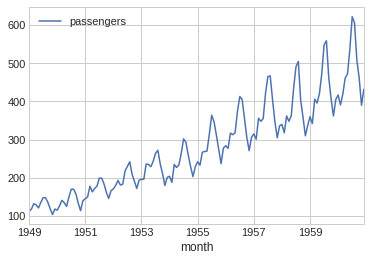

In [269]:
fig = data.plot()

# 시계열 분해 - seasonal_decomposition
아래 3가지 항목을 확인해 보는 함수
- trend(추세요인)
- seanoality(계절요인)
- cycle(residual)(불규칙 또는 순환요인)

In [270]:
# import statsmodels.tsa.api as tsa
# decomposition = tsa.seasonal_decompose(data['passengers'], model='additive', period=1)

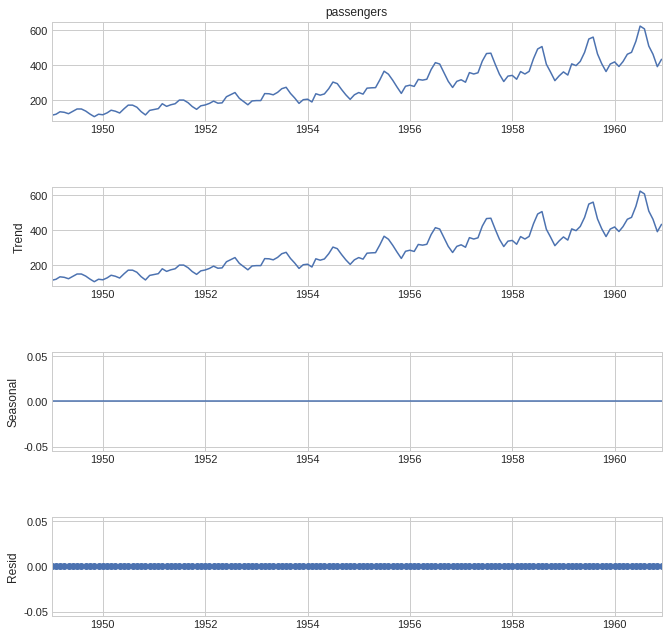

In [271]:
decomposition = sm.tsa.seasonal_decompose(data['passengers'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

In [272]:
train_data, test_data =  train_test_split(data, test_size=0.2, shuffle=False)

# 정상성 판단
- 트렌드가 점자 증가: 비정상성
- 트렌드로 확인이 어려운 경우, ACF로 판단: ACF가 점차 줄어들면 비정상성. 빠르게 줄어들면 정상성.

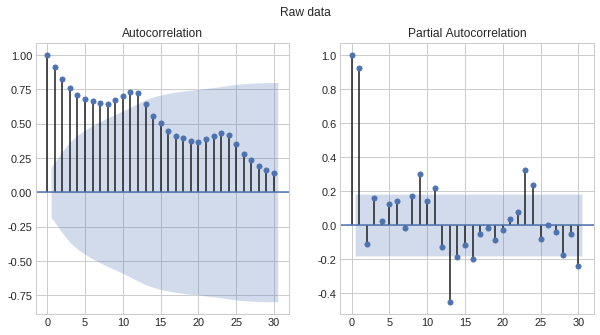

In [273]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle('Raw data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);

# 정상성 판단2 (단위근 검정)
- 단위근: 확률론 데이터 검정에서 쓰이는 개념으로 시계열 데이터는 시간에 따라 일정한 규칙을 가짐
- AR이 포함된 모형과 연관이 있다.
- Augmented Dickey-Fuller test
    - 귀무가설: 자료에 단위근이 존재한다. (안정적이지 않다.)
    - 대립가설: 시계열 자료가 정상성을 만족한다. p-value < 0.05

In [274]:
from statsmodels.tsa.stattools import adfuller

In [275]:
result = adfuller(train_data['passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.356889
p-value: 0.917052
Critical Test Statistics Values:
	1%: -3.497
	5%: -2.891
	10%: -2.582


### 결과해석
- p-value > 0.05 이므로 귀무가설 채택. 즉, 데이터는 정상성을 만족하지 않는다.

# 차분
- 데이터가 정상성을 띄지 않으므로 정상성을 같도록 차분을 진행해야함

In [276]:
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff()

# 차분을 하면 마지막 값은 값이 없으므로 결측치 처리를 해야함
diff_train_data = diff_train_data.dropna()

In [277]:
train_data.head(2)

,passengers
month,
1949-01-01,112
1949-02-01,118


In [278]:
diff_train_data.head(2)

month
1949-02-01     6.0
1949-03-01    14.0
Name: passengers, dtype: float64

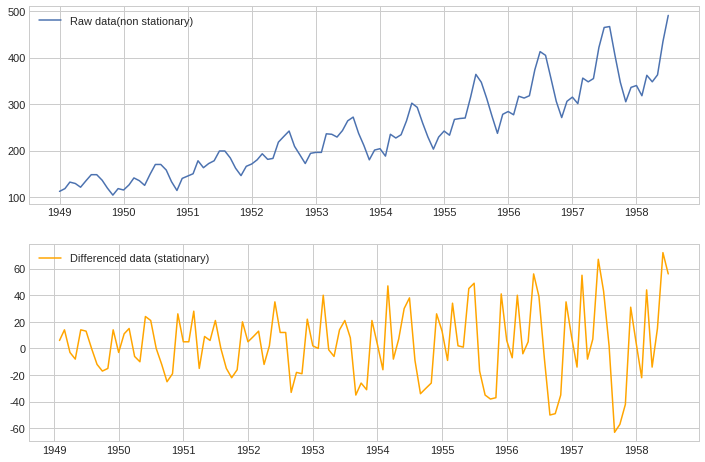

In [279]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(train_data['passengers'])
plt.legend(["Raw data(non stationary)"])

plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced data (stationary)'])
plt.show()

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


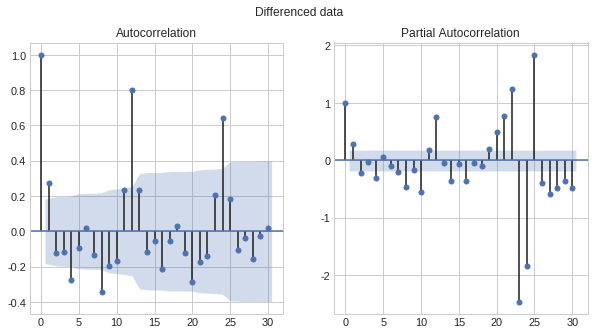

In [280]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle('Differenced data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

# 모델 선정 방법

|Model|ACF|PACF|
|-----|---|----|
|MA(q)|q 시차 이후 0으로 절단|지수적으로 감소(소멸)하는 sin 함수 형태|
|AR(p)|지수적으로 감소(소멸)하는 sin 함수 형태|p 시차 이후 0으로 절단|
|ARMA(p,q)|시차(q-p) 이후부터 소멸|시차(q-p) 이후부터 소멸|

# 임의의 계수와 차분으로 모델링

- order(p,d,q)
    - p: AR에서의 p구간에서의 상관관계
    - d: 차분
    - q: MA에서 PACF 값의 편상관계수

In [281]:
model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -531.720
Method:                       css-mle   S.D. of innovations             25.659
Date:                Fri, 25 Mar 2022   AIC                           1069.440
Time:                        23:37:23   BIC                           1077.649
Sample:                             1   HQIC                          1072.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5123      3.329      1.055      0.291      -3.012      10.036
ar.L1.D.y      0.2803      0.091      3.077      0.002       0.102       0.459
                                    Roots           

# 정확히 파라미터 뽑아보기

In [282]:
# 너무 길어서 주석
# p = range(0, 3)
# d = range(1, 2)
# q = range(0, 3)
# pdq = list(itertools.product(p, d, q))

# aic = []
# for i in pdq:
#     model = ARIMA(train_data.values, order=(i))
#     model_fit = model.fit()
#     print(f'ARIAM:{i} >> AIC: {round(model_fit.aic, 2)}')
#     aic.append(round(model_fit.aic, 2))

# 최종 파라미터 선정
- AIC가 낮을수록 좋은 모델

In [283]:
# optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
# optimal

In [284]:
# 위 결과 미리 뽑음
optimal = [((2, 1, 1), 1045.66)]

In [285]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()
print(model_opt_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -517.830
Method:                       css-mle   S.D. of innovations             22.316
Date:                Fri, 25 Mar 2022   AIC                           1045.660
Time:                        23:37:23   BIC                           1059.341
Sample:                             1   HQIC                          1051.212
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5600      0.162     15.754      0.000       2.241       2.878
ar.L1.D.y      1.0890      0.085     12.816      0.000       0.922       1.256
ar.L2.D.y     -0.4730      0.086     -5.528      0.0

# 위 모델에서 주로 확인해야할 부분
- AIC
- BIC
- HQIC
- 계수들의 p-value
- ARIMA는 회귀분석에서 잔차의 정규성을 무시하고 만들기 때문에 잘 안봄

# 모델 해석 지표

- 최대우도추정: 특정 데이터가 모수로부터 추출되었을 가능도 (특정 값에 대한 분포의 확률 추정)
    - 연속확률분포의 y값에 해당. AIC는 최대우도를 바탕으로 계산됨
- AIC(Akaike Information Criterion): 데이터에 대한 모델의 상대적 품질
    - -2 * ln(L) + 2k
    - 값이 낮을수록 모형 적합도가 높은 것을 의미한다.
- BIC(Bayes Informationriterion): 데이터에 대한 모델의 상대적 품질
    - -2 * ln(L) + log(n)p
    - 설명변수가 많은 경우에 AIC 보다 많은 페널티를 줘서 계산
- HQIC(Hanna Quinn Information Criterion)
    - -2 * ln(L) + 2k * ln((ln(n))
    - 값이 낮을수록 괜찮은 모델

# 잔차 진단

잔차가 백색잡음을 따르는가: 잔차의 시계열이 평균 0을 중심으로 무작위로 움직임


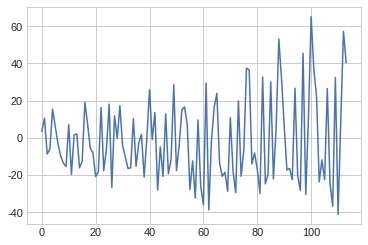

In [286]:
print('잔차가 백색잡음을 따르는가: 잔차의 시계열이 평균 0을 중심으로 무작위로 움직임')
plt.plot(model_opt_fit.resid)
plt.show()

qqplot: 정규성을 만족한다면 빨간 선에 점들이 분포해야함


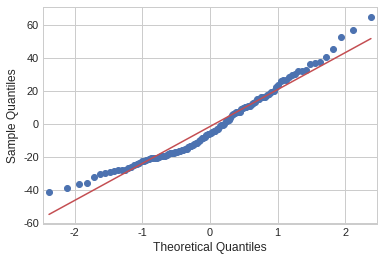

In [287]:
from statsmodels.graphics.gofplots import qqplot
print('qqplot: 정규성을 만족한다면 빨간 선에 점들이 분포해야함')
qqplot(model_opt_fit.resid, line='s')
plt.show()

잔차의 히스토그램이 정규분포와 비슷한지 판단


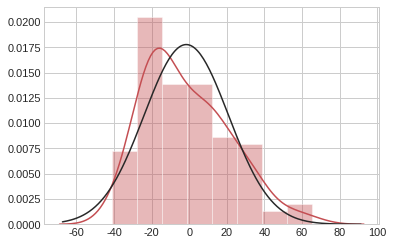

In [288]:
print("잔차의 히스토그램이 정규분포와 비슷한지 판단")
from scipy.stats import norm
sns.distplot(model_opt_fit.resid, fit=norm, kde=True, color='r')
plt.show()

잔차에 대한 ACF


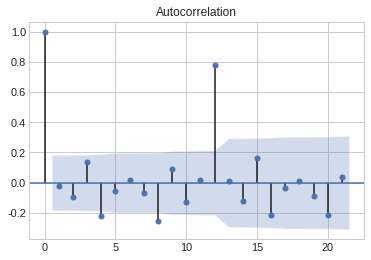

In [289]:
print('잔차에 대한 ACF')
sm.graphics.tsa.plot_acf(model_opt_fit.resid);
# sm.graphics.tsa.plot_pacf(model_opt_fit.resid);
plt.show()

# 예측값 확인

In [290]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:, 0]
predicted_lb = prediction[2][:, 1]
predicted_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

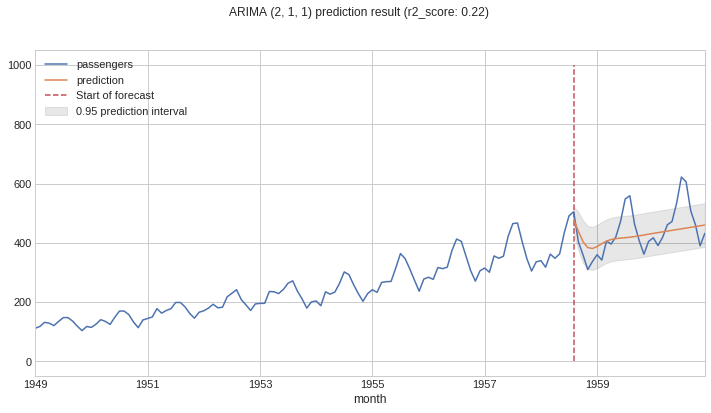

In [291]:
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(ax=ax);

# test data 시작점 -> "1958-08-01"
ax.vlines(str(test_data.iloc[0].name), 0, 1000, linestyle='--', color='r', label='Start of forecast');
ax.plot(predicted_index, predicted_value, label="prediction")
ax.fill_between(predicted_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label="0.95 prediction interval")
ax.legend(loc='upper left')

plt.suptitle(f'ARIMA {optimal[0][0]} prediction result (r2_score: {round(r2, 2)})')
plt.show()

# SARIMA

- seasonal order (P,D,Q,M)
    - P: 계절성 주기에서의 패턴이 어떤가.
    - D: 계절성 여부 판단. 0 or 1
    - Q: ACF 기준으로 주기의 패턴(계절성)이 얼마나 반복되는지
    - M: 계절성 주기가 어느정도 있는가? 주기를 나타냄

In [292]:
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [293]:
# aic = []
# params = []
# for i in pdq:
#     for j in seasonal_pdq:
#         try:
#             model = SARIMAX(train_data.values, order=(i), seasonal_order=(j))
#             model_fit = model.fit()
#             print(f'SARIMA:{i} >> AIC: {round(model_fit.aic, 2)}')
#             aic.append(round(model_fit.aic, 2))
#             params.append((i, j))
#         except:
#             continue

In [294]:
# optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
# optimal

In [295]:
optimal = [(((1, 1, 0), (1, 1, 2, 12)), 751.15)]

model_opt = SARIMAX(train_data.values, order=optimal[0][0][0], seasonal_order=optimal[0][0][1])
model_opt_fit = model_opt.fit()
print(model_opt_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -370.574
Date:                                 Fri, 25 Mar 2022   AIC                            751.148
Time:                                         23:37:27   BIC                            764.273
Sample:                                              0   HQIC                           756.463
                                                 - 115                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2362      0.093     -2.546      0.011      -0.418      -0

In [296]:
# arima와 조금 다름
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()[:,0]
predicted_lb = prediction.conf_int()[:,1]
predicted_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

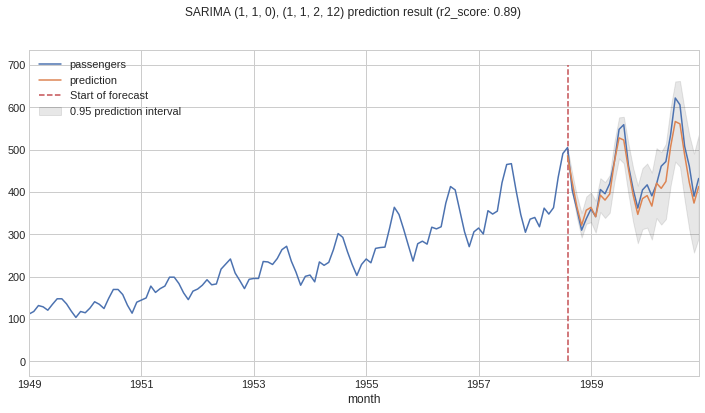

In [297]:
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(ax=ax);

# test data 시작점 -> "1958-08-01"
ax.vlines(str(test_data.iloc[0].name), 0, 700, linestyle='--', color='r', label='Start of forecast');
ax.plot(predicted_index, predicted_value, label="prediction")
ax.fill_between(predicted_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label="0.95 prediction interval")
ax.legend(loc='upper left')

plt.suptitle(f'SARIMA {optimal[0][0][0]}, {optimal[0][0][1]} prediction result (r2_score: {round(r2, 2)})')
plt.show()

# try~exceptioin을 해결한 유용한 패키지

In [298]:
from pmdarima.arima import auto_arima # pip install pmdarima

In [299]:
# auto_arima??

In [300]:
auto_arima_model = auto_arima(train_data, 
                              start_p=1,
                              start_q=1,
                              max_p=3,
                              max_q=3,
                              m=12,
                              seasonal=True,
                              d=1,
                              D=1,
                              max_P=3, max_Q=3,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=False,
                              n_jobs=-1
                             )


Best model:  ARIMA(1,1,0)(1,1,3)[12]          
Total fit time: 17.749 seconds


In [301]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -370.278
Date:                                    Fri, 25 Mar 2022   AIC                            752.557
Time:                                            23:37:45   BIC                            768.307
Sample:                                                 0   HQIC                           758.934
                                                    - 115                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.093     -2.388      0.017      -0.404      -0.040
ar.S.L12       0.9288      0.275      3.374      0.001       0.389       1.468
ma.S.L12      -1.2065      0.448     -2.692      0.007      -2.085      -0.328
ma.S.L24       0.2771      0.174      1.596      0.111      -0.063       0.618
ma.S.L36       0.1251      0.164      0.765      0.444      -0.195       0.446
sigma2        75.0386     19.073      3.934      0.000      37.656     112.421
===================================================================================
Ljung-Box (Q):                       40.92   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.43   Prob(JB):                         0.29
Heteroskedasticity (H):               1.05   Skew:                             0.37
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# auto arima 사용한 예측 및 결과

In [302]:
# auto arima를 이용한 예측
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predicted_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

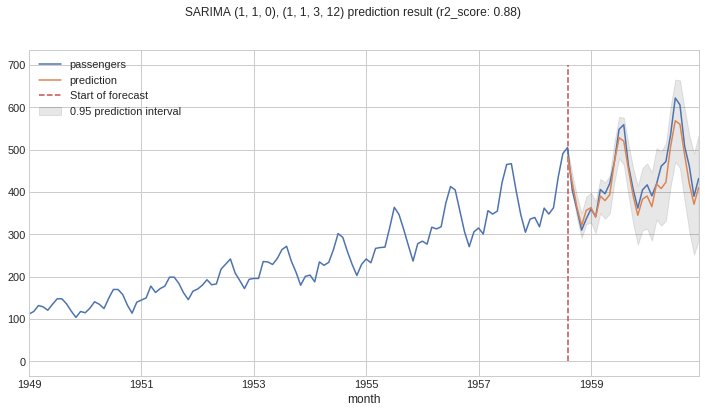

In [303]:
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(ax=ax);

# test data 시작점 -> "1958-08-01"
ax.vlines(str(test_data.iloc[0].name), 0, 700, linestyle='--', color='r', label='Start of forecast');
ax.plot(predicted_index, predicted_value, label="prediction")
ax.fill_between(predicted_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label="0.95 prediction interval")
ax.legend(loc='upper left')

plt.suptitle(f'SARIMA {auto_arima_model.order}, {auto_arima_model.seasonal_order} prediction result (r2_score: {round(r2, 2)})')
plt.show()

- 잔차의 정규성 판단
    - 잔차가 백색잡음을 따르는가 (좌상): 잔차의 시계열이 평균 0을 중심으로 무작위로 움직임
    - 히스토그램 (우상): 잔차의 히스토그램이 정규분포와 비슷한지 판단
    - qqplot (좌하): 정규성을 만족한다면 빨간 선에 점들이 분포해야함
    - 잔차에 대한 ACF: 

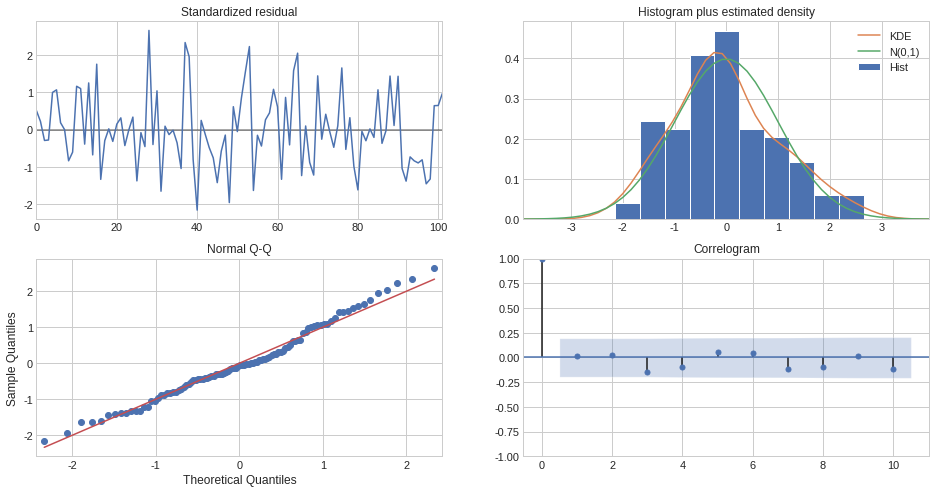

In [304]:
# plt.figure(figsize=(12, 8))
auto_arima_model.plot_diagnostics(figsize=(16, 8));
plt.show()

---

---

---

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1번
온,습도,조도,CO2농도에 따른 객실의 사용유무 판별     
종속변수 Occupancy, 0: 비어있음 , 1: 사용중    

데이터 경로 : /kaggle/input/adp-kr-p1/problem1.csv

### 1 - (1)
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [ ]:
import pandas as pd
df =pd.read_csv('/kaggle/input/adp-kr-p1/problem1.csv')
df.info()

In [ ]:
display(df.isnull().sum())
print()
print(df[df.CO2.isnull()].date.values)
print('\n결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()
for v in df.select_dtypes(include='float'):
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()
    
print('''
Humidity, HumidityRatio컬럼은 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다
''')

In [ ]:
display(df[df.Light <0].shape)
display(df.describe())
print('''
Light컬럼의 경우 -99인 값이 50개 존재한다. 
''')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
timedeltas = df['date'].diff().dt.seconds.dropna()
display(timedeltas.describe())
print()
print('''
75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다. 
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼수 있다
''')

### 1 - (2)
결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

CO2 컬럼에 nan값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy값이 변화하지 않거나, date값이 3분이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체 한다. 위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 데이터의 품질을 손상 시키지 않다고 판단 할 수 있다

In [ ]:
for value in df[df.CO2.isnull()].index:
    target = df.iloc[value-1:value+2]
    difftime = target['date'].diff().dt.seconds.dropna()
    if target.Occupancy.nunique() ==1 and len(difftime[difftime>180]) ==0:
        df.loc[value,'CO2'] =df.loc[value-1].CO2

In [ ]:
df.isnull().sum()

### 1 - (3)
추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

In [ ]:
df.loc[df.Light ==-99,'Light'] = 0

Light 컬럼의 -99는 예외값에 대해 임의 값을 입력한 것으로 보인다. -99를 제외한 컬럼의 최솟값인 0으로 대체한다.
평균적으로 시간은 1분 간격의 데이터이다. 하지만 최대 7시간의 공백이 존재한다. 이를 보간 해주는 것도 방법 일수 있지만,시계열 모델을 사용하지 않을 것이기에 보간을 따로 해주지 않고 모델링을 진행한다.

### 2 - (1)
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성


In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(df['date'],df['Occupancy'].astype('str'),s=0.03)
plt.show()
df.Occupancy.value_counts()

print('''
Occupancy 의 경우 7:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다
''')

### 2 - (2)
오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

1. 랜덤오버샘플링   
소수 클래스 데이터중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식     
- 장점 : 데이터 불균형 문제 해결 
- 단점 : 종속변수에 대한 고려없이 중복 생성, overfitting의 가능성이 존재
2. SMOTE      
소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
- 장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성
- 단점 : 고차원 데이터에는 문제가 발생할 수 있다

### 2 - (3)
오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

In [ ]:
from sklearn.model_selection import train_test_split

# train,test 데이터를 분리하고 train 데이터에 대해서만 오버 샘플링을 진행한다 
X  =df.drop(columns=['Occupancy'])
y  =df['Occupancy']

X_train , X_test , y_train, y_test  = train_test_split(X,y,stratify=y,random_state=43,test_size=0.35)


from imblearn.over_sampling import RandomOverSampler,SMOTE

#datetime 형태로는 샘플링 할수 없기에 timestamps 형식으로 바꿔서 샘플링을 진행한다
X_train.loc[:,'datetime'] = X_train['date'].view('int') // 10**9
X_test.loc[:,'datetime'] = X_test['date'].view('int') // 10**9


from sklearn.preprocessing import StandardScaler


X_imb  = X_train.drop(columns = ['date']).reset_index(drop=True).copy()
y_imb  = y_train.reset_index(drop=True).copy()

X_samp, y_samp = RandomOverSampler(random_state=2022).fit_resample(X_imb,y_imb)
total = pd.concat([X_samp,y_samp],axis=1)
total['date'] = pd.to_datetime(total['datetime'], unit='s')


SMOTE_X_samp, SMOTE_y_samp = SMOTE(random_state=2022).fit_resample(X_imb,y_imb)
SMOTE_total = pd.concat([SMOTE_X_samp,SMOTE_y_samp],axis=1)
SMOTE_total['date'] = pd.to_datetime(SMOTE_total['datetime'], unit='s')


plt.figure(figsize=(15,4))
plt.title('RandomSampling')
plt.scatter(total['date'],total['Occupancy'].astype('str'),s=0.03)
plt.show()



plt.figure(figsize=(15,4))
plt.title('SMOTE')
plt.scatter(SMOTE_total['date'],SMOTE_total['Occupancy'].astype('str'),s=0.03)
plt.show()

print('''
RandomSampling 대비 SMOTE에서 좀 더 다양한 차원의 샘플이 생성됨을 볼수 있다. (02-18일 부근)
''')

### 3 - (1)
속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

이진 분류 문제이다.    
속도측면에서는 linear regression,    
정확도 측면에서는 randomforest classifier를 선택하여 분석을 진행하겠다

### 3 - (2)
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler


# 불필요 컬럼제거 및 스케일링

if 'date' in X_train.columns:
    X_train = X_train.drop(columns=['date'])
    
if 'date' in X_test.columns:
    X_test = X_test.drop(columns=['date'])




result_auc_train = []
result_auc_test = []
result_time = []
for train_X,trainy in [(X_train,y_train),(X_samp, y_samp),(SMOTE_X_samp, SMOTE_y_samp)]:
    
    trainX = train_X.copy()
    testX = X_test.copy()
    sc = MinMaxScaler()    
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
    
    
    lrstart = time.time()
    lr =LogisticRegression()
    lr.fit(trainX,trainy)
    lrend = time.time() - lrstart

    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(trainy,lr.predict(trainX))
    auc_lr = roc_auc_score(y_test,pred_lr)
    
    rfstart = time.time()
    rf =RandomForestClassifier()
    rf.fit(trainX,trainy)
    rfend = time.time() - rfstart
    
    pred_rf  = rf.predict(testX)
    auc_rf_train  = roc_auc_score(trainy,rf.predict(trainX))
    auc_rf  = roc_auc_score(y_test,pred_rf)
    
    result_auc_test.append([auc_lr,auc_rf])
    result_time.append([lrend,rfend])
    result_auc_train.append([auc_lr_train,auc_rf_train])

In [ ]:
#logistic regression 과 randomforest 분류기를 샘플링방식에 따른 학습시 정확도와 모델 학습 시간에 대해서 평가했다.

print('훈련셋 모델 auc 결과')
result_auc_trains = pd.DataFrame(result_auc_train)
result_auc_trains.index = ['raw','randomSampling','SMOTE']
result_auc_trains.columns = ['logistic','randomforest']
display(result_auc_trains)

print('테스트셋 모델 auc 결과')
result_auc_tests = pd.DataFrame(result_auc_test)
result_auc_tests.index = ['raw','randomSampling','SMOTE']
result_auc_tests.columns = ['logistic','randomforest']
display(result_auc_tests)

print('모델 학습시간 (sec)')
result_times = pd.DataFrame(result_time)
result_times.index = ['raw','randomSampling','SMOTE']
result_times.columns = ['logistic','randomforest']
result_times

### 3 - (3)
위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라



logistic regression의 경우 학습시간은 random forest에 비해 낮게 나왔지만 모델 성능의 경우 train셋의 경우 모두 낮게 나왔으며 test셋의 경우 업샘플링을 하지 않은 경우를 제외하고는 모두 성능이 낮게 나왔다. randomforest의 경우 학습 모델의 경우 auc값이 1로 오버피팅 됐다. test셋에 대해서는 raw , randomSampling, SMOTE 순서로 auc값이 증가하는것을 확인 할수 있다

# 2번
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오    
데이터 경로 : /kaggle/input/adp-kr-p1/problem2.csv

### 1
귀무가설, 연구가설 세우기

귀무가설 : 데이터의 중위수는 1만 시간이다     
연구가설 : 데이터의 중위수는 1만 시간이 아니다

### 2
유효한 데이터의 개수는?

In [ ]:
df = pd.read_csv('/kaggle/input/adp-kr-p1/problem2.csv')
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 : ',df[df['life span']==10000].shape[0])

df_fillter = df[df['life span'] != 10000]

### 3
검정통계량 및 연구가설 채택 여부를 작성하라

In [ ]:
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_fillter['life span']-10000)
print('검정통계량은 ',static,'이다. pvalue는 ',pvalue,'로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. ')

# 3번
코로나 시계열 데이터     
데이터 출처(후처리과정 미포함) :https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv    
     
데이터 경로 : /kaggle/input/adp-kr-p1/problem3_covid2.csv

### 1 
데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [ ]:
df = pd.read_csv('/kaggle/input/adp-kr-p1/problem3_covid2.csv')

target = df.groupby(['location','date']).sum().groupby(level=0).cumsum()
target.columns = ['cumulative sum']
target = target.reset_index()
target

## 2
1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라)  국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

In [ ]:
from scipy.spatial import distance
import statsmodels.api as sm

name =[]
for lo in target.location.unique():
    
    v = sm.tsa.stattools.acf(target[target.location==lo]['cumulative sum'], nlags=50, fft=False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)

In [ ]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


data =v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = sch.linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:,2])
dend_res3 = sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()


# 4번
아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라    
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p1/problem4.png?raw=true)


### 1번
귀무가설, 연구가설 세우기

귀무가설 : 학과와 성적은 관련이 없다 (독립이다)    
연구가설 : 학과와 성적은 관련이 있다 (독립이 아니다)

In [ ]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]})
df.index = ['1.5-2.5','2.5-3.5','3.5-4.5']
df

### 2번
학과와 성적이 독립일 경우의 기댓값을 구하시오

In [ ]:

from scipy.stats import chi2_contingency,fisher_exact
chi2 , p ,dof, expected = chi2_contingency(df)
print(expected)


### 3번
검정통계량 구하고 연구가설의 채택여부 작성

In [ ]:
print(p)

# 카이 제곱 검정시 p-value는 0.00018로 귀무가설을 기각한다. 학과와 성적은 관련이 있다.

# 만약 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다. #print(fisher_exact(df))